<a href="https://colab.research.google.com/github/vinay-gowda/Exploratory-data-analysis-on-Airbnb-Bookings-data/blob/main/Team_adamant_EDA_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Step-1: Importing the required libraries

In [ ]:
#Step-1: importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

#Step-2: Extracting or importing the data from the provided dataset.

In [ ]:
#Step-2: Extracting or importing the data from the provided dataset.
##mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##import csv
df_data = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE/EDA - AIRBNB BOOKING/Airbnb NYC 2019.csv")

#Step-3: Data exploration; understanding the data.

In [ ]:
#Step-3: Data exploration; understanding the data.
## looking into head of data
df_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
## looking into tail of data
df_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df_data.shape

(48895, 16)

In [ ]:
## getting the size of dataset
print(f'Number of rows = {df_data.shape[0]}')
print(f'Number of columns = {df_data.shape[1]}')

Number of rows = 48895
Number of columns = 16


In [ ]:
## looking into columns names and type of data and identifying catagorical and numerical columns
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
## looking into number of unique data in each column
df_data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
## studying the data in catagorical columns
print(f"neighbourhood_group: {list(df_data['neighbourhood_group'].unique())}")
print(f"room_type: {list(df_data['room_type'].unique())}")

neighbourhood_group: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
room_type: ['Private room', 'Entire home/apt', 'Shared room']


In [ ]:
## Sorting 'calculated_host_listings_count' column in descending
df_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Columns descriptions
1. **id** : Serial number for the given dataset. (Numerical data)
2. **name** : Name of hotel/lodge. (Catagorical data)
3. **host_id** : Unique id for individual host. (Numerical data)
4. **host_name** : Host Name (Catagorical data)
5. **neighbourhood_group** : Grouping done based on their location. (Catagorical data)
6. **neighbourhood** : Sub catagory grouping done based on their location. (Catagorical data)
7. **latitude** : Geographical co-ordinates latitude. (Numerical data)
8. **longitude** : Geographical co-ordinates latitude. (Numerical data)
9. **room_type** : Type of room. (Catagorical data)
10. **price** : price of each room per night in USD. (Numerical data)
11. **minimum_nights** : minimum number of nights that a guest can book a short-term vacation rental. (Numerical data)
12. **number_of_reviews** : Number of reviews provided for a hotel/lodge. (Numerical data)
13. **last_review** : Date of last review. (DateTime data)
14. **reviews_per_month** : Average reviews per month. (Numerical data)
15. **calculated_host_listings_count** : The number of listings for a particular host. (Numerical data)
16. **availability_365** : an indicator of the total number of days the listing is available for during the year. (Numerical data)


##Step-4 : Data Cleaning

*   Droping unwanted columns.
*   Conversion of datatype
*   Handling missing dataset in columns.
*   Handling Outliers in dataset.



In [ ]:
#Step-4 : Data Cleaning
## Droping unwanted columns
### In the given set of data 'latitude' and 'longitude' are kind of unwanted since, we are not doing any GPS operations.

#Let us make a copy of dataset as 'df_airbnb'
df_airbnb = df_data.drop(['latitude','longitude'],axis=1)


In [ ]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
##Conversion of datatype

#Handling missing dataset in columns.

## Replacing 'NaN' can be done using two methods
1.   Mean Value Substitution
2.   Random Sample Imputation




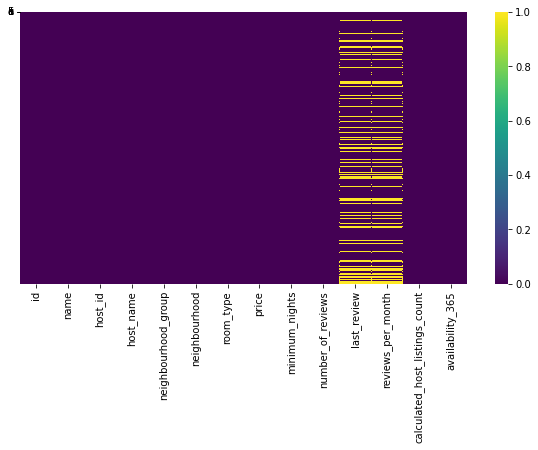

In [ ]:
# To find out columns which have null values, we use following visulization method
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df_airbnb.isnull(),yticklabels='False',cbar='False',cmap='viridis')

In [ ]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# rows with host name null
## here we will just cross check wheather the host id with host name 'NaN' which has any any repetative records had host name
host_name_null = df_airbnb[df_airbnb['host_name'].isnull()]
host_name_null.head(22)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,Private room,28,1,1,2015-08-01,0.02,1,0


In [ ]:
list_of_null_host_id = list(host_name_null['host_id'])

In [ ]:
list_of_null_host_id

[526653,
 7779204,
 919218,
 23077718,
 24576978,
 32722063,
 33134899,
 32722063,
 5162530,
 39608626,
 7822683,
 26138712,
 5300585,
 100971588,
 415290,
 159156636,
 159156636,
 159156636,
 177146433,
 119609345,
 228750026]

In [ ]:
df_empty = pd.DataFrame(columns=list(df_airbnb.columns))
for ele in list_of_null_host_id:
  locate = df_airbnb[df_airbnb['host_id'] == ele]
  print(locate[['host_id','host_name']])

     host_id host_name
360   526653       NaN
      host_id host_name
2700  7779204       NaN
      host_id host_name
5745   919218       NaN
       host_id host_name
6075  23077718       NaN
       host_id host_name
6582  24576978       NaN
       host_id host_name
8163  32722063       NaN
8852  32722063       NaN
       host_id host_name
8257  33134899       NaN
       host_id host_name
8163  32722063       NaN
8852  32722063       NaN
      host_id host_name
9138  5162530       NaN
       host_id host_name
9817  39608626       NaN
       host_id host_name
14040  7822683       NaN
        host_id host_name
14631  26138712       NaN
       host_id host_name
15174  5300585       NaN
         host_id host_name
19565  100971588       NaN
       host_id host_name
27777   415290       NaN
         host_id host_name
27962  159156636       NaN
28042  159156636       NaN
28274  159156636       NaN
         host_id host_name
27962  159156636       NaN
28042  159156636       NaN
28274  15915663

In [ ]:
# from above output we came to know that the all the records with host name 'NaN' does'nt have any repetative record where we could'nt find host name.

#Removing NaN values

##Columns which has 'NaN' values are
'name' , 'host_name', 'last_review' and 'reviews_per_month'



In [ ]:
sum_of_null = df_airbnb.isnull().sum()
sum_of_null

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
perc_of_null = sum_of_null/len(df_airbnb)*100
perc_of_null

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

# Since column 'last_review', 'reviews_per_month' have 20% more NaN values, replacing NaN may cause discrepancy in orignal data. Is is better to drop those rows.

# also from the above analysis, 'name' and 'host_name' columns also need to remove all those NaN values.

In [ ]:

df_airbnb_clean = df_airbnb.dropna()

In [ ]:
df_airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               38821 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
df_airbnb_clean.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#Handling Outliers in dataset

In [ ]:
#check for info of numerical data 
df_airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               38821 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
df_airbnb_clean.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Outliers need to be removed from columns 'price','	minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'.

maximum value of 'availability_365' is 365 which looks like genuine value.

We follow Inter Quantile Range (IRQ) method to remove outliers:







1.   Q1 is 25% percentile.
2.   Q3 is 75% percentile.
3.   IRQ = Inter Quartile Range by Q3 - Q1
4.   Lower bound limit = Q1 - 1.5 x IQR
5.   Lower bound limit = Q3 + 1.5 x IQR




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


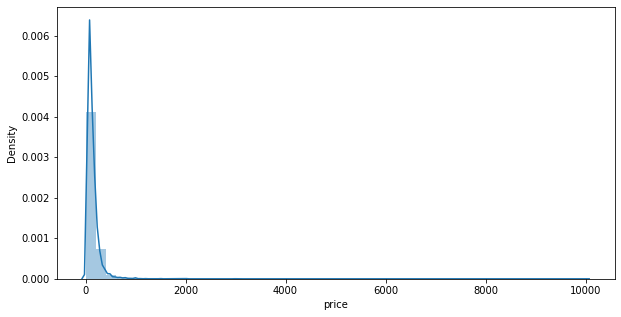

In [ ]:
# for column 'price'
sns.distplot(df_airbnb_clean['price'])

from the above distribution plot we conclude that the price column data is left skewed.

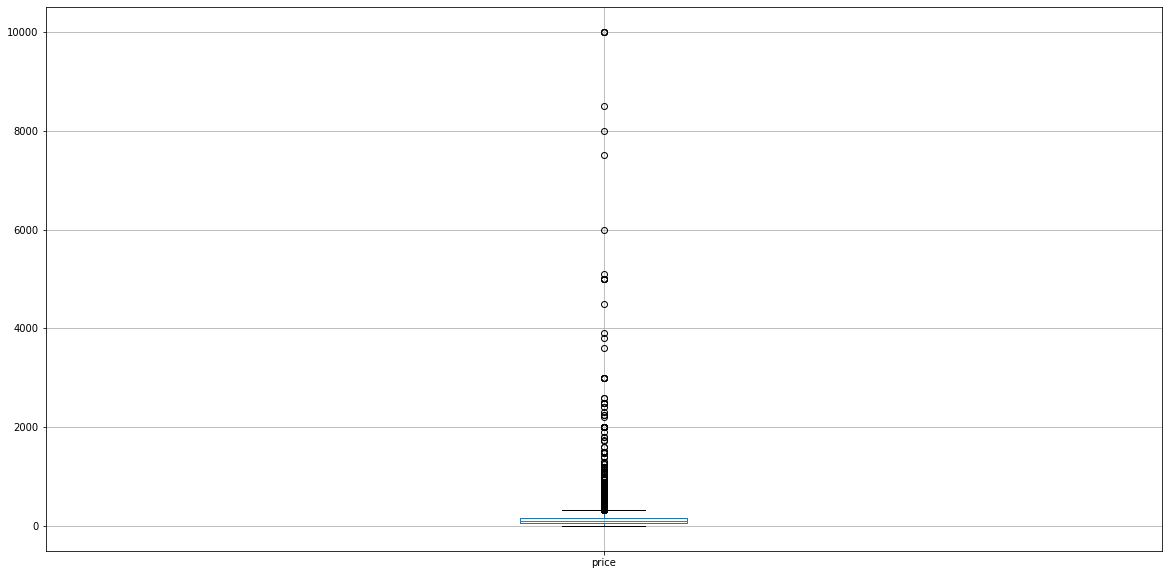

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
figure=df_airbnb_clean.boxplot(column="price")

In [ ]:
df_airbnb_clean['price'].describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# Let us compute the IRQ, upper and lower bound limit for 'price'.
irq = df_airbnb_clean.price.quantile(0.75) - df_airbnb_clean.price.quantile(0.25)
lower_bound_limit = df_airbnb_clean['price'].quantile(0.25)-(irq*1.5)
upper_bound_limit = df_airbnb_clean['price'].quantile(0.75)+(irq*1.5)
print(lower_bound_limit),print(upper_bound_limit)
df_airbnb_clean['price'].mean()


-82.5
321.5


142.33252621004095

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


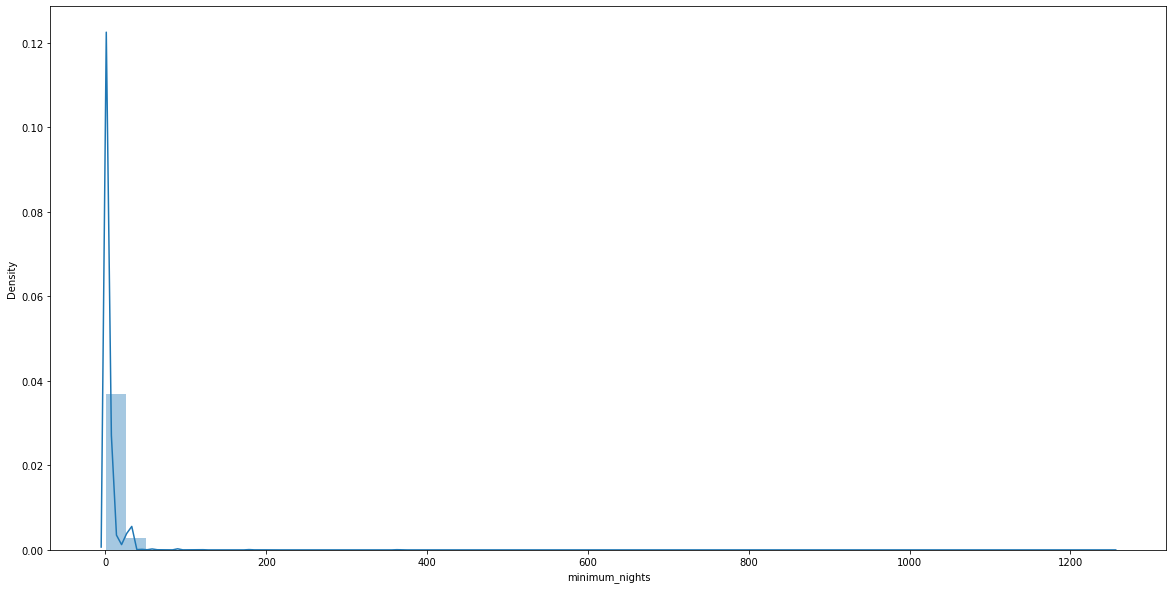

In [ ]:
# for column 'minimum_nights'
sns.distplot(df_airbnb_clean['minimum_nights'])

from the above distribution plot we conclude that the price column data is left skewed.

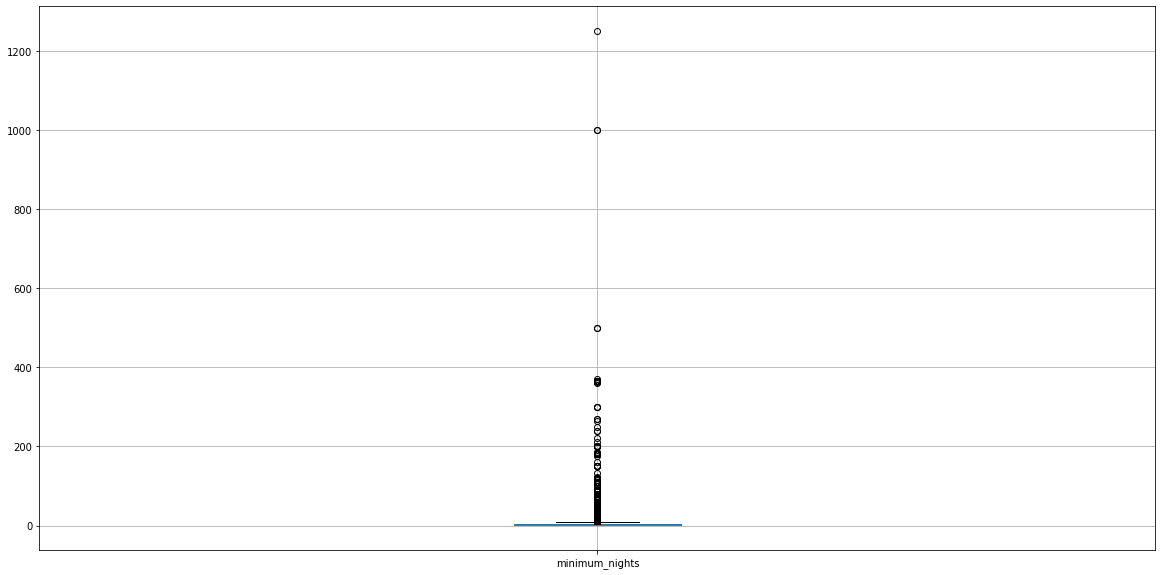

In [ ]:
figure=df_airbnb_clean.boxplot(column="minimum_nights")

In [ ]:
df_airbnb_clean['minimum_nights'].describe()

count    38821.000000
mean         5.869220
std         17.389026
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
# Let us compute the IRQ, upper and lower bound limit for 'minimum_nights'.
irq_2 = df_airbnb_clean.minimum_nights.quantile(0.75) - df_airbnb_clean.minimum_nights.quantile(0.25)
lower_bound_limit_2 = df_airbnb_clean['minimum_nights'].quantile(0.25)-(irq_2*1.5)
upper_bound_limit_2 = df_airbnb_clean['minimum_nights'].quantile(0.75)+(irq_2*1.5)
print(lower_bound_limit_2),print(upper_bound_limit_2)
df_airbnb_clean['minimum_nights'].mean()

-3.5
8.5


5.869220267381056

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


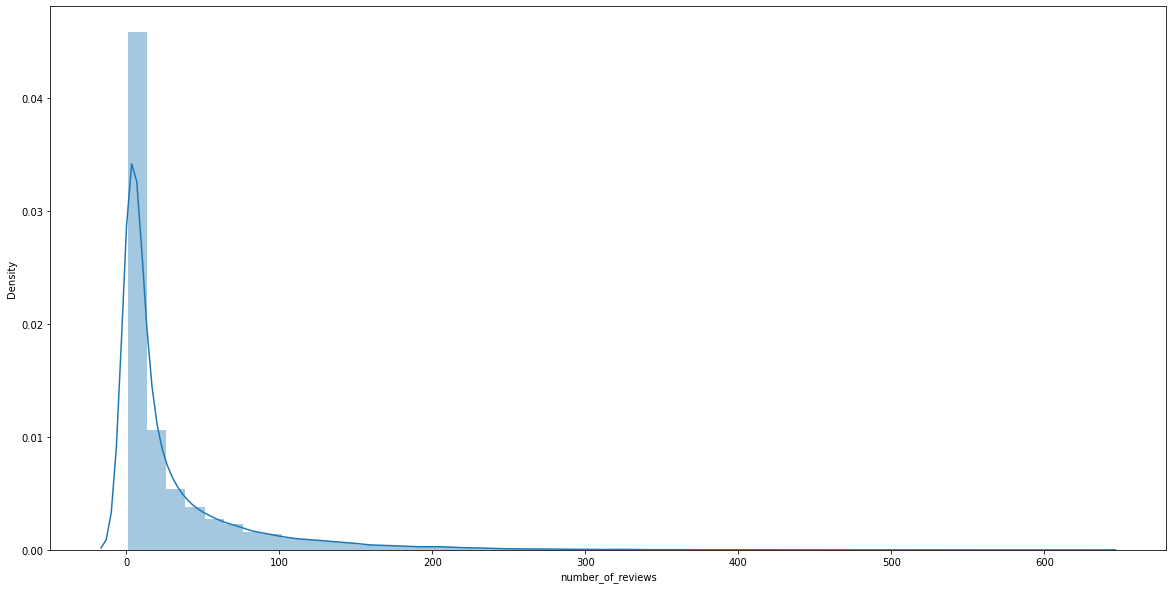

In [ ]:
# for column 'number_of_reviews'
sns.distplot(df_airbnb_clean['number_of_reviews'])


from the above distribution plot we conclude that the price column data is left skewed.

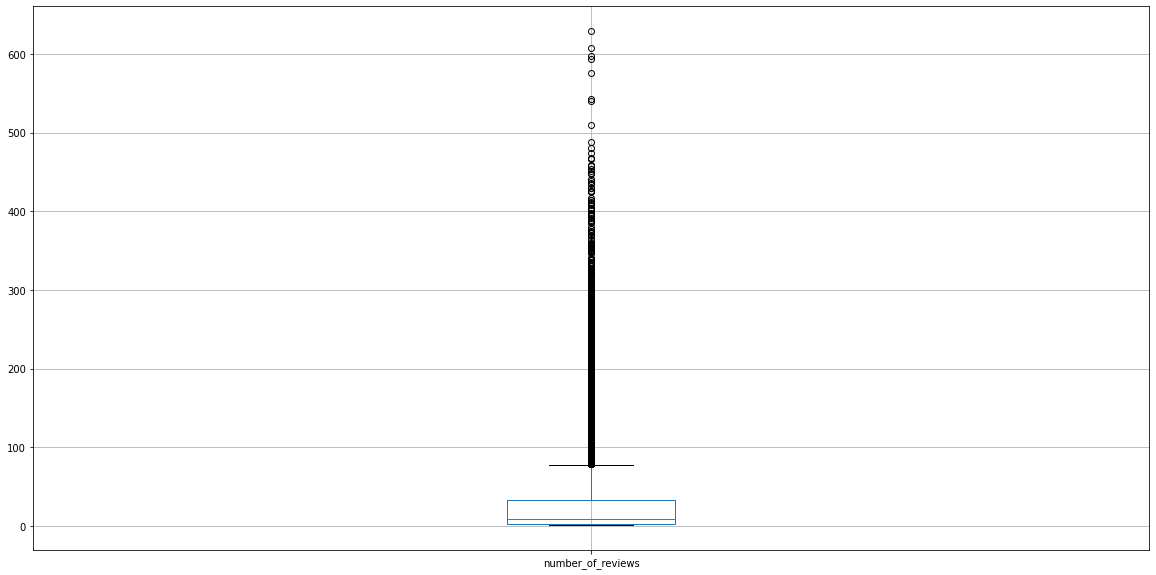

In [ ]:
figure=df_airbnb_clean.boxplot(column="number_of_reviews")

In [ ]:
df_airbnb_clean['number_of_reviews'].describe()

count    38821.000000
mean        29.290255
std         48.182900
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
# Let us compute the IRQ, upper and lower bound limit for 'number_of_reviews'.
irq_3 = df_airbnb_clean.number_of_reviews.quantile(0.75) - df_airbnb_clean.number_of_reviews.quantile(0.25)
lower_bound_limit_3 = df_airbnb_clean['number_of_reviews'].quantile(0.25)-(irq_3*1.5)
upper_bound_limit_3 = df_airbnb_clean['number_of_reviews'].quantile(0.75)+(irq_3*1.5)
print(lower_bound_limit_3),print(upper_bound_limit_3)
df_airbnb_clean['number_of_reviews'].mean()

-42.0
78.0


29.290255274207258

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


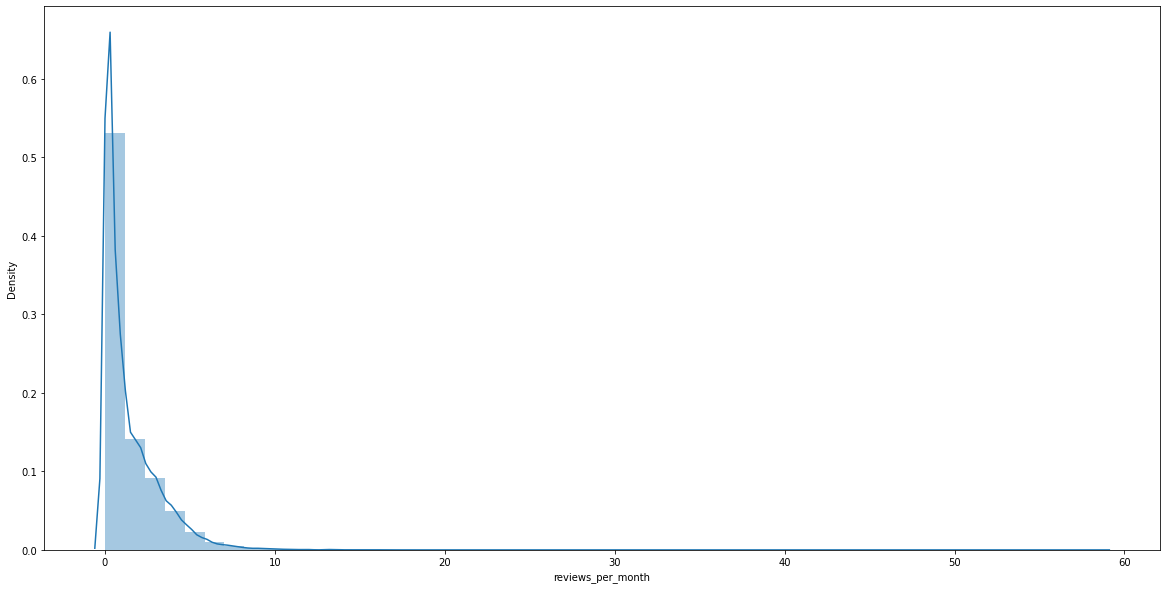

In [ ]:
# for column 'price'
sns.distplot(df_airbnb_clean['reviews_per_month'])

from the above distribution plot we conclude that the price column data is left skewed.

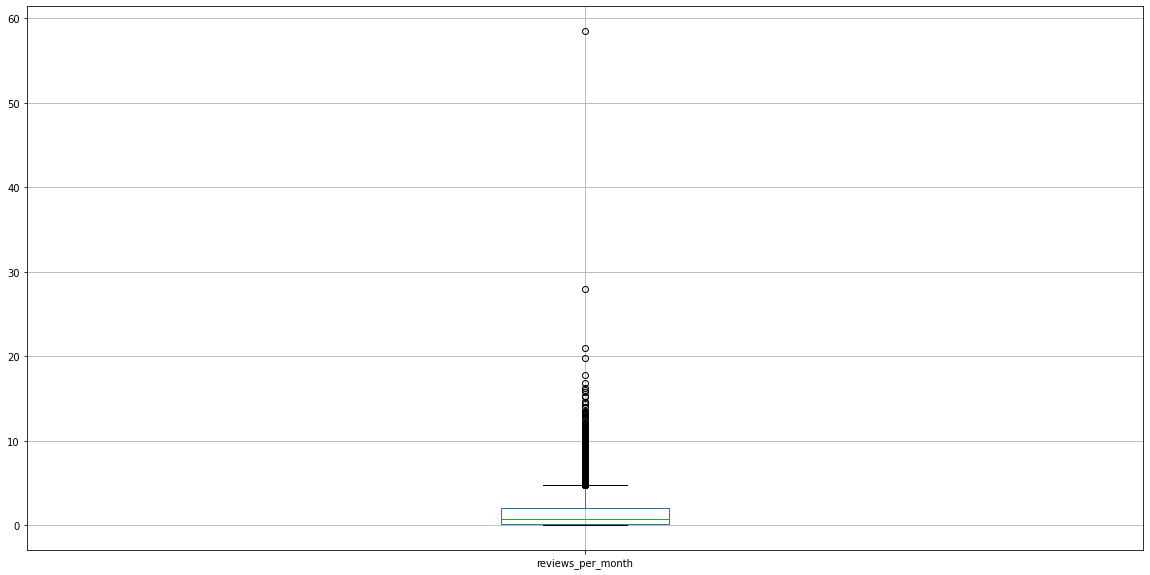

In [ ]:
figure=df_airbnb_clean.boxplot(column="reviews_per_month")

In [ ]:
df_airbnb_clean['reviews_per_month'].describe()

count    38821.000000
mean         1.373229
std          1.680328
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [ ]:
# Let us compute the IRQ, upper and lower bound limit for 'reviews_per_month'.
irq_4 = df_airbnb_clean.reviews_per_month.quantile(0.75) - df_airbnb_clean.reviews_per_month.quantile(0.25)
lower_bound_limit_4 = df_airbnb_clean['reviews_per_month'].quantile(0.25)-(irq_4*1.5)
upper_bound_limit_4 = df_airbnb_clean['reviews_per_month'].quantile(0.75)+(irq_4*1.5)
print(lower_bound_limit_4),print(upper_bound_limit_4)
df_airbnb_clean['reviews_per_month'].mean()

-2.555
4.765000000000001


1.373229180082972

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


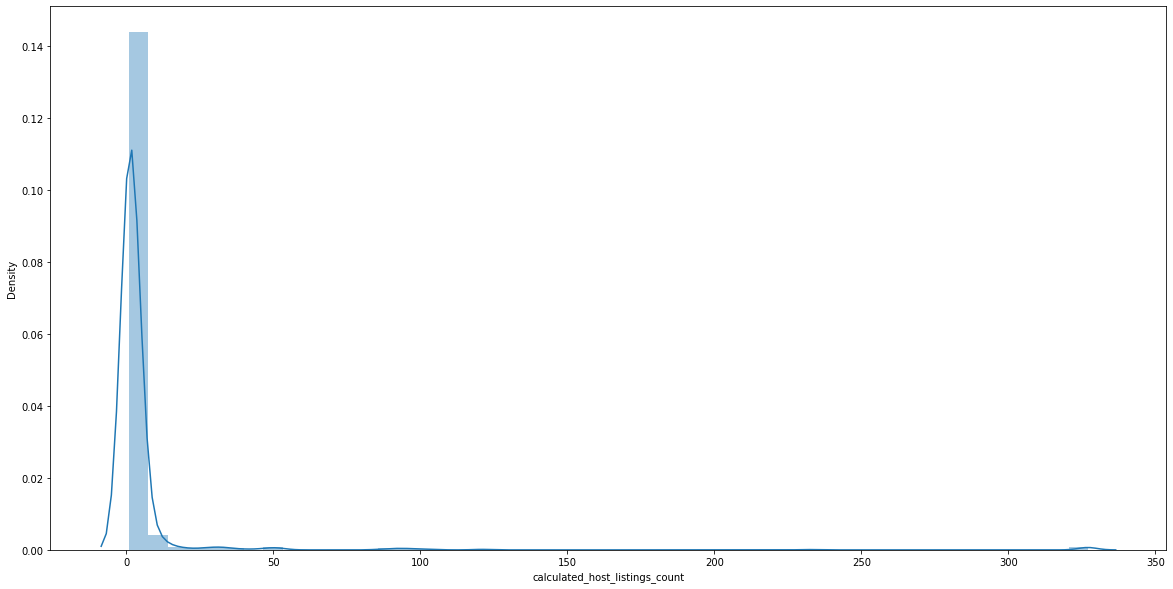

In [ ]:
# for column 'calculated_host_listings_count'
sns.distplot(df_airbnb_clean['calculated_host_listings_count'])


from the above distribution plot we conclude that the price column data is left skewed.

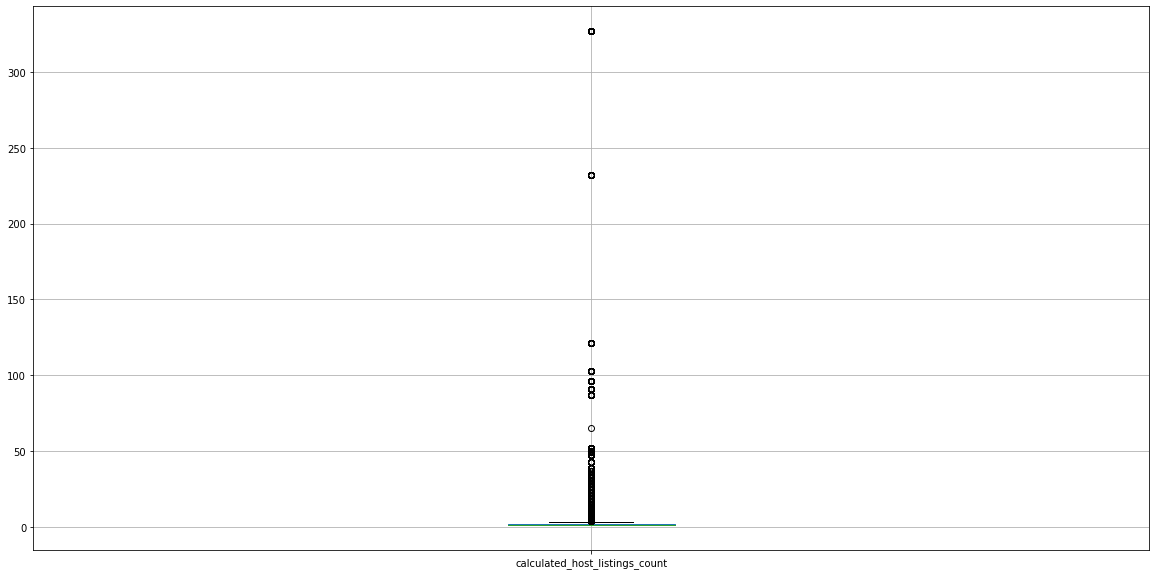

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
figure=df_airbnb_clean.boxplot(column="calculated_host_listings_count")

In [ ]:
df_airbnb_clean['calculated_host_listings_count'].describe()

count    38821.000000
mean         5.166611
std         26.302954
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
# Let us compute the IRQ, upper and lower bound limit for 'calculated_host_listings_count'.
irq_5 = df_airbnb_clean.calculated_host_listings_count.quantile(0.75) - df_airbnb_clean.calculated_host_listings_count.quantile(0.25)
lower_bound_limit_5 = df_airbnb_clean['calculated_host_listings_count'].quantile(0.25)-(irq_5*1.5)
upper_bound_limit_5 = df_airbnb_clean['calculated_host_listings_count'].quantile(0.75)+(irq_5*1.5)
print(lower_bound_limit_5),print(upper_bound_limit_5)
df_airbnb_clean['calculated_host_listings_count'].mean()

-0.5
3.5


5.16661085494964

In [ ]:
#Copying the dataset

df_airbnb_viz = df_airbnb_clean.copy()

In [ ]:
#replacing all the values which are greater than upper bound limit with upper bound limit
df_airbnb_viz.loc[df_airbnb_viz['price']>=321.5,'price']=321.5
df_airbnb_viz.loc[df_airbnb_viz['minimum_nights']>=8.5,'minimum_nights']=8.5
df_airbnb_viz.loc[df_airbnb_viz['number_of_reviews']>=78.0,'number_of_reviews']=78.0
df_airbnb_viz.loc[df_airbnb_viz['reviews_per_month']>=4.765,'reviews_per_month']=4.765
df_airbnb_viz.loc[df_airbnb_viz['calculated_host_listings_count']>=3.5,'calculated_host_listings_count']=3.5



In [ ]:
# lambda function - conversion from string to datetime
def last_rev(enter_string_date):
  '''lambda function - conversion from string to datetime.''' 
  return pd.to_datetime(enter_string_date,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [ ]:
df_airbnb_viz['conv_last_dt'] = df_airbnb_viz.apply(lambda x: last_rev(x['last_review']),axis=1)

In [ ]:
# lambda function - conversion from string to datetime
def give_year(enter_date): 
  return enter_date.year

In [ ]:
df_airbnb_viz['last_year'] = df_airbnb_viz.apply(lambda x: give_year(x['conv_last_dt']),axis=1)
# df_airbnb_viz['last_year'] = df_airbnb_viz['conv_last_dt'].year

In [ ]:
df_airbnb_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   room_type                       38821 non-null  object        
 7   price                           38821 non-null  float64       
 8   minimum_nights                  38821 non-null  float64       
 9   number_of_reviews               38821 non-null  int64         
 10  last_review                     38821 non-null  object        
 11  re

In [ ]:
df_airbnb_viz.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_year
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,128.252119,3.263826,22.285361,1.297276,1.613972,114.886299,2018.288323
std,1.069372e+07,7.589752e+07,78.206487,2.411976,26.078143,1.395019,0.933436,129.529950,1.180598
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,2011.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,2018.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000,2019.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000,2019.000000
max,3.645581e+07,2.738417e+08,321.500000,8.500000,78.000000,4.765000,3.500000,365.000000,2019.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


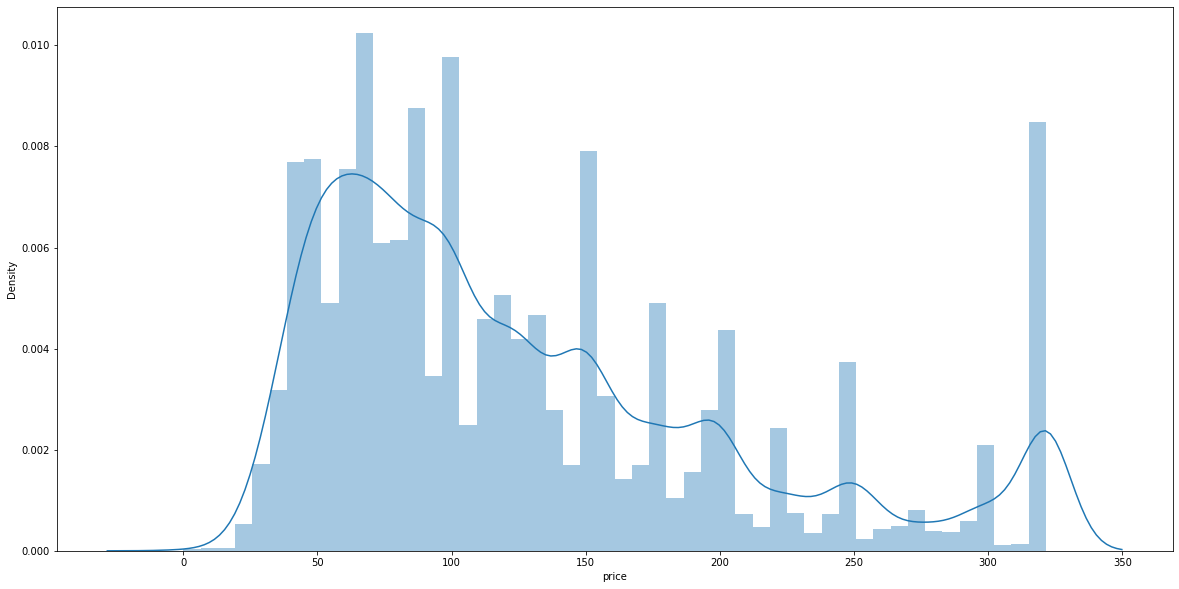

In [ ]:
# for column 'price'
sns.distplot(df_airbnb_viz['price'])

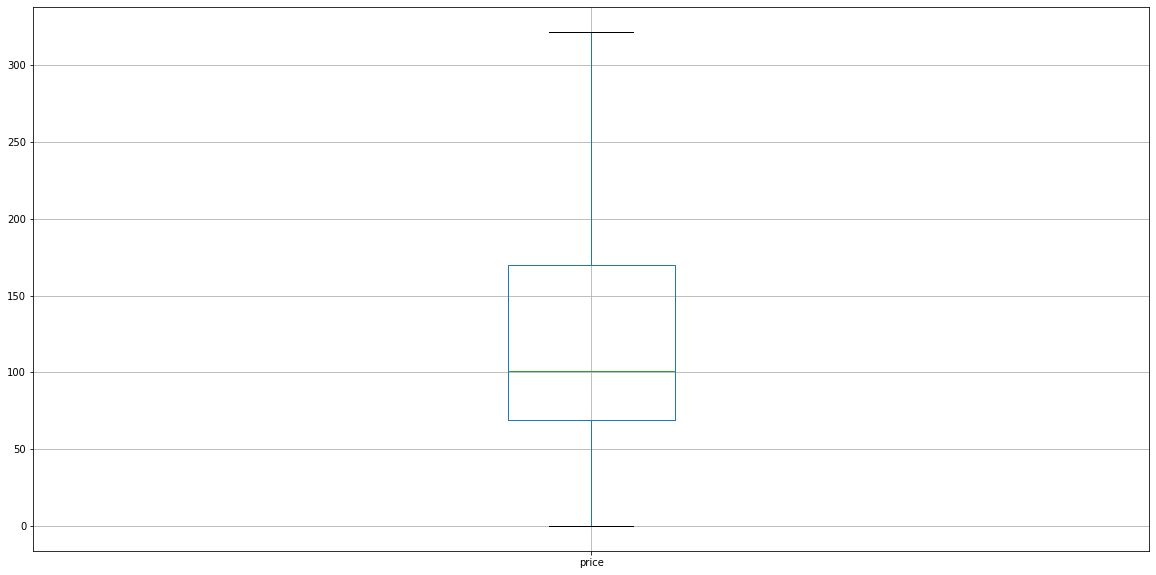

In [ ]:
figure=df_airbnb_viz.boxplot(column="price")

In [ ]:
df_airbnb_viz.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,conv_last_dt,last_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1.0,9,2018-10-19,0.21,3.5,365,2018-10-19,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45,2019-05-21,0.38,2.0,355,2019-05-21,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,78,2019-07-05,4.64,1.0,194,2019-07-05,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80.0,8.5,9,2018-11-19,0.10,1.0,0,2018-11-19,2018
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200.0,3.0,74,2019-06-22,0.59,1.0,129,2019-06-22,2019


In [ ]:
df_airbnb_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   room_type                       38821 non-null  object        
 7   price                           38821 non-null  float64       
 8   minimum_nights                  38821 non-null  float64       
 9   number_of_reviews               38821 non-null  int64         
 10  last_review                     38821 non-null  object        
 11  re

In [ ]:
df_airbnb_viz['neighbourhood'].nunique()

218

Questions:
1.  Which are the top 3 neighbourhoods in Manhattan has highest average nights for booking private rooms?
2. Which are the top 3 Nighbourhood groups with maximum number of reviews till date?
3. Find the top 5 hotels with highest number of reviews in the year 2019.
4. What type of property does the high priced hotels prefer?
5. What is the average preferred price by customers according to the location?
6. Show the growth trend of average price of hotels in Manhattan 
7. What is the minimum number of nights stayed in ecah room type?
8. Find relation between average reviews per month and Nighbourhood groups for each room type.
9. Show the spread of average prefered price by customers according to the number of reviews of hotel.
10. What are the average avilability throughout the year of room types in each Nighbourhood group?
11. Prefered hotels with highest monthly reviews at the price range of 200-300 USD in Sunnyside neighbourhood.
12. Most rated / demanded host in Brooklyn as per Airbnb booking data.
13. Top 10 hosts with maximum number of listings.
14. Top 10 low-priced hosts with maximum avilability.
15. Top 10 reviewed hosts with maximum number of reviews.
16. What is the average price of private rooms in Williamsburg.


## Q1. Which are the top 3 neighbourhoods in Manhattan has highest average nights for booking private rooms?

Text(0.5, 0, 'Neighbourhood')

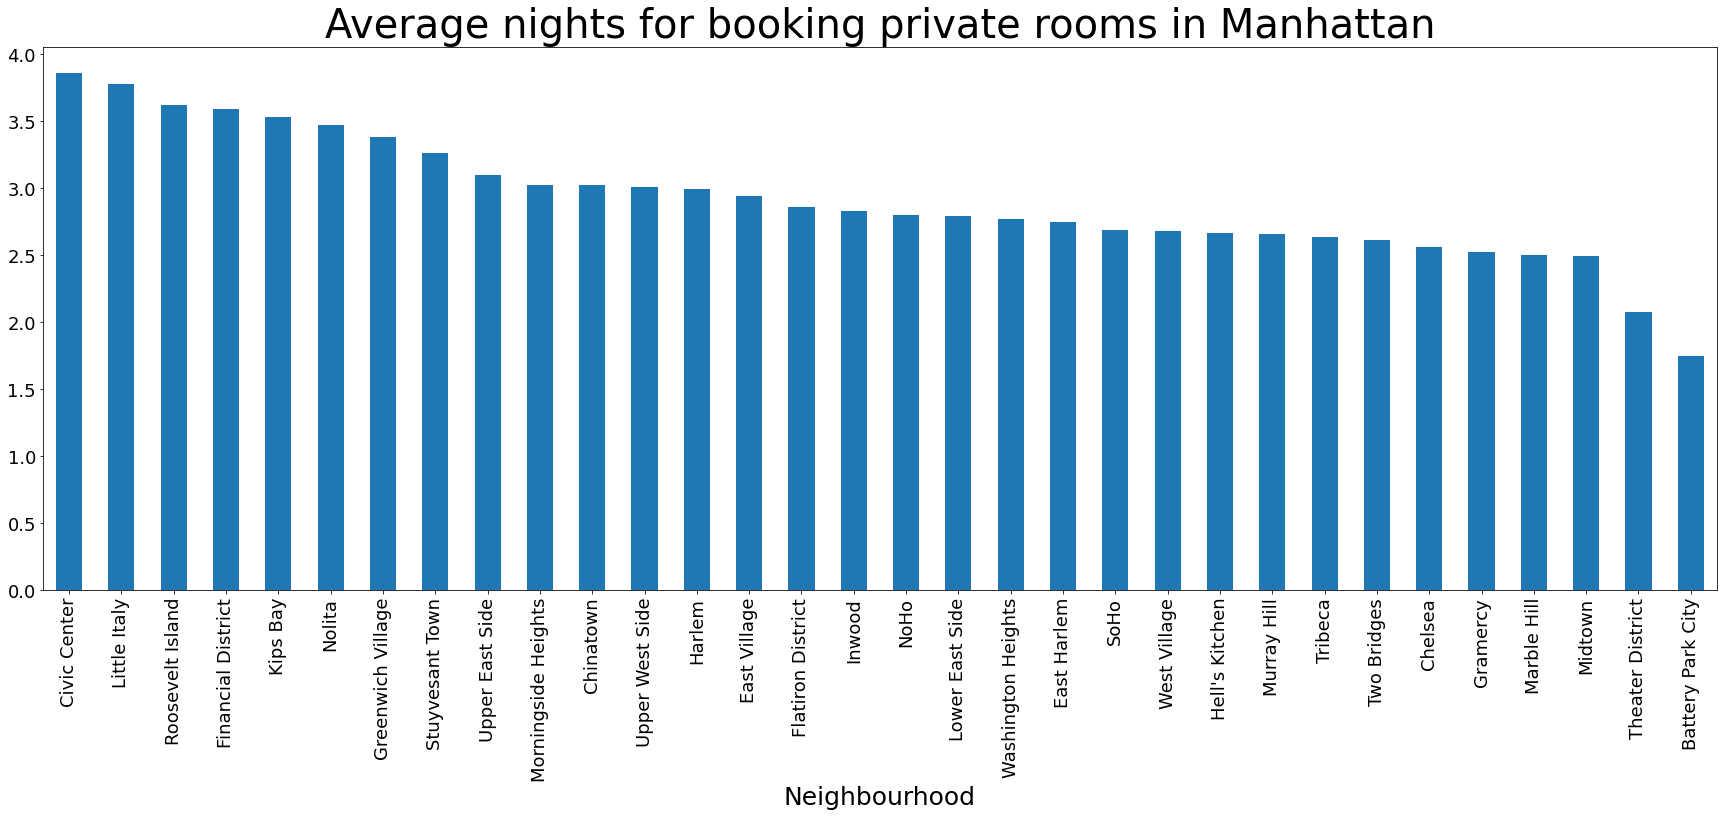

In [ ]:
#Which are the top 3 neighbourhoods in Manhattan has highest average nights for booking private rooms?
q1_data = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Private room']
q1_data2 = q1_data[q1_data['neighbourhood_group'] == 'Manhattan']
# q1_data.head()
q1_data3 = q1_data2.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)


q1_data3.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Average nights for booking private rooms in Manhattan', fontsize = 40)
plt.xlabel('Neighbourhood', fontsize = 25)
# plt.rcParams['figure.figsize'] = (30, 10)

In [ ]:
q1_data3.head(3)

neighbourhood
Civic Center        3.863636
Little Italy        3.781250
Roosevelt Island    3.622449
Name: minimum_nights, dtype: float64

###Solution : Civic Center, Little Italy, Roosevelt

## Q2. Which are the top 3 Nighbourhoods with maximum number of reviews till date?

Text(0.5, 0, 'Neighbourhood')

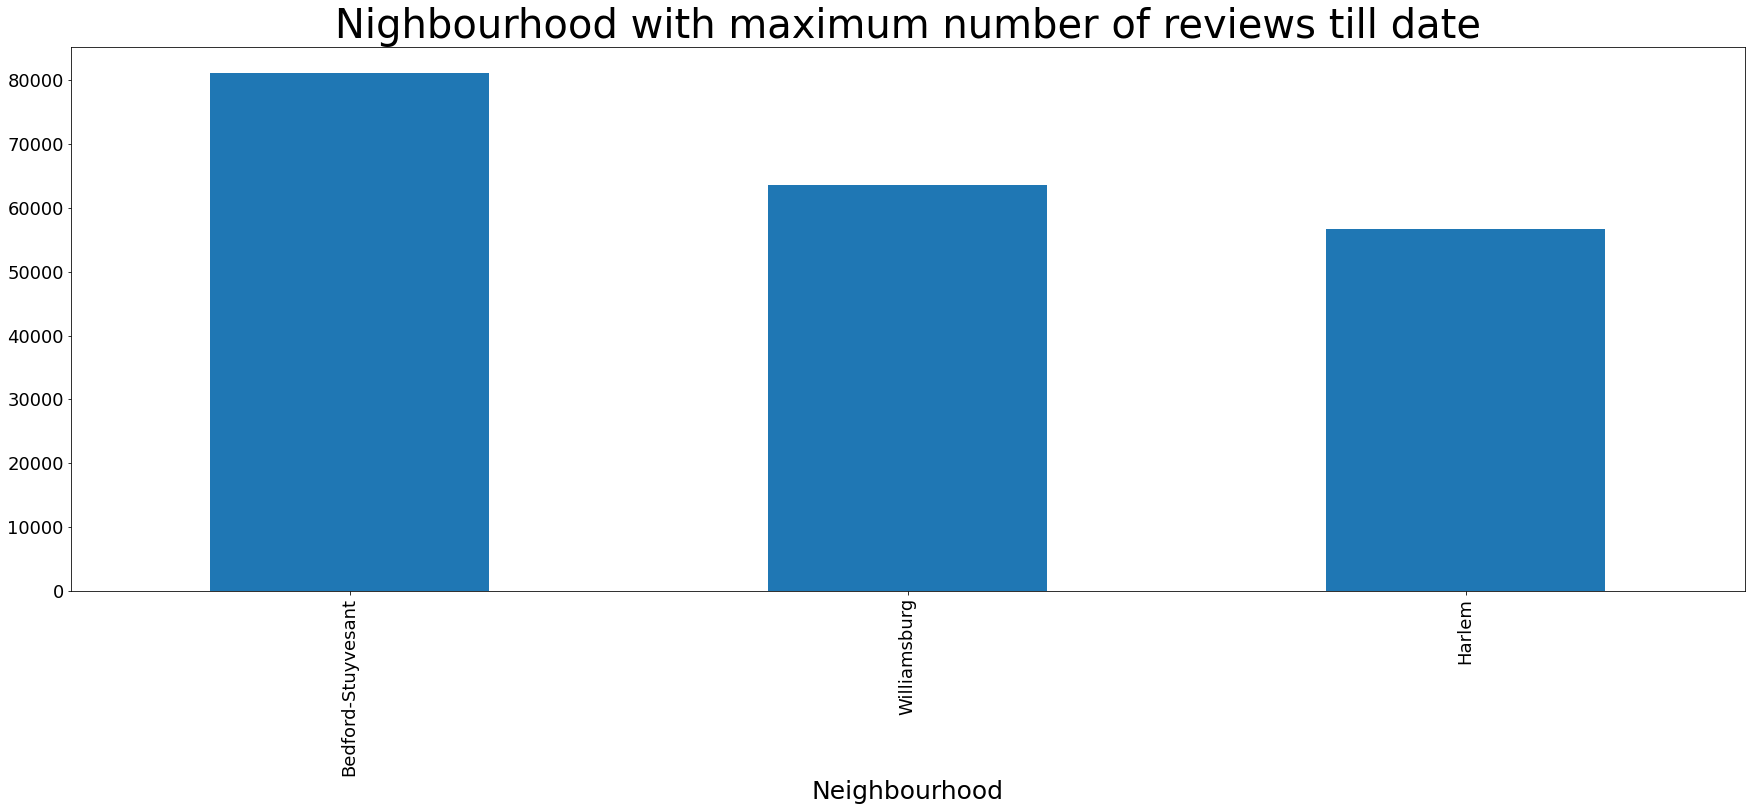

In [ ]:
#Which are the top 3 Nighbourhoods with maximum number of reviews till date?

q2_data1 = df_airbnb_viz.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False)

q2_data1.head(3).plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Nighbourhood with maximum number of reviews till date', fontsize = 40)
plt.xlabel('Neighbourhood', fontsize = 25)
# # plt.rcParams['figure.figsize'] = (30, 10)

In [ ]:
q2_data1.head(3)

neighbourhood
Bedford-Stuyvesant    81161
Williamsburg          63541
Harlem                56660
Name: number_of_reviews, dtype: int64

###Solution : Brooklyn, Manhattan, Queens

## Q3. Find the top 5 hotels with highest number of reviews in the year 2019.

Text(0.5, 0, 'Neighbourhood')

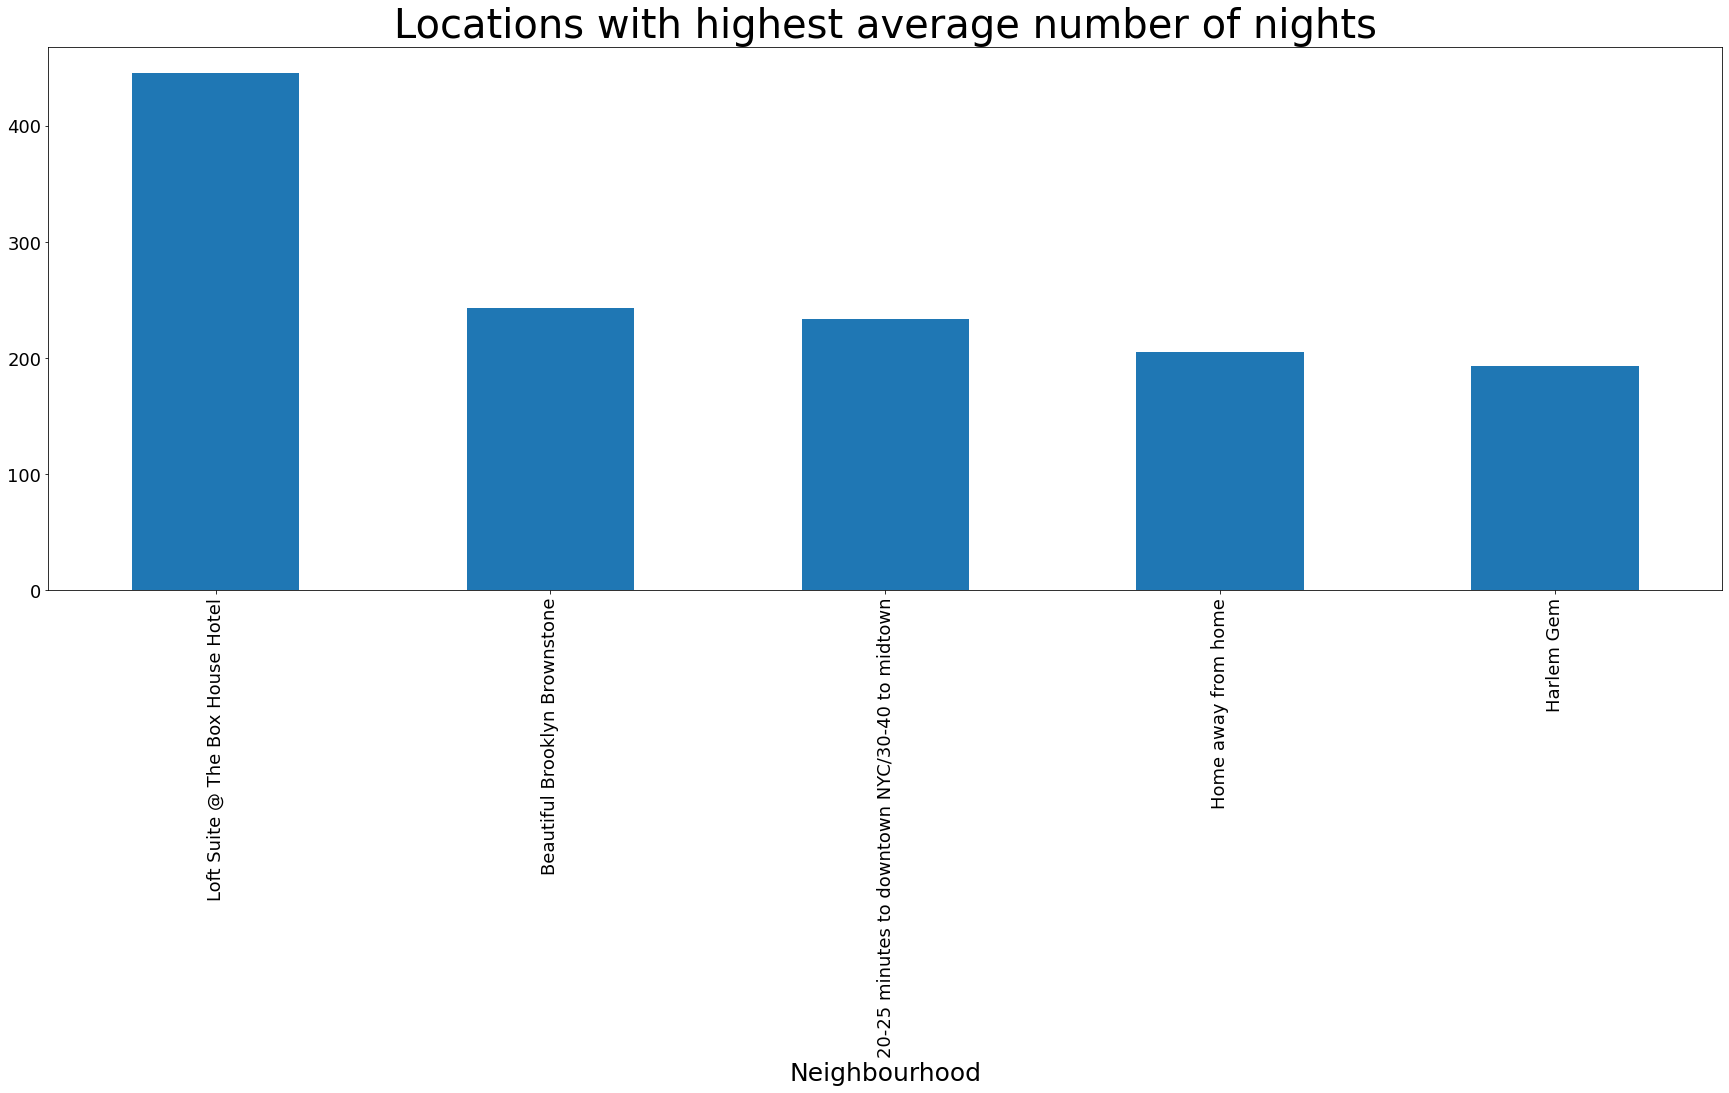

In [ ]:
#Find the top 5 hotels with highest number of reviews in the year 2019.
q3_data1 = df_airbnb_viz[df_airbnb_viz['last_year'] == 2019]
q3_data2 = q3_data1.groupby('name')['number_of_reviews'].sum().sort_values(ascending=False)
q3_data2.head(5).plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Locations with highest average number of nights', fontsize = 40)
plt.xlabel('Neighbourhood', fontsize = 25)
# plt.rcParams['figure.figsize'] = (30, 10)

In [ ]:
q3_data2.head(5)

name
Loft Suite @ The Box House Hotel                  446
Beautiful Brooklyn Brownstone                     243
20-25 minutes to downtown NYC/30-40 to midtown    234
Home away from home                               205
Harlem Gem                                        193
Name: number_of_reviews, dtype: int64

## Q4. What type of property does the high reviewed hotel prefer in Manhattan?

The highest number of reviewed hotel in Manhatten is Harlem Gem


Text(0.5, 1.0, 'Type of property does the highest number of reviewed hotel prefer in Manhattan')

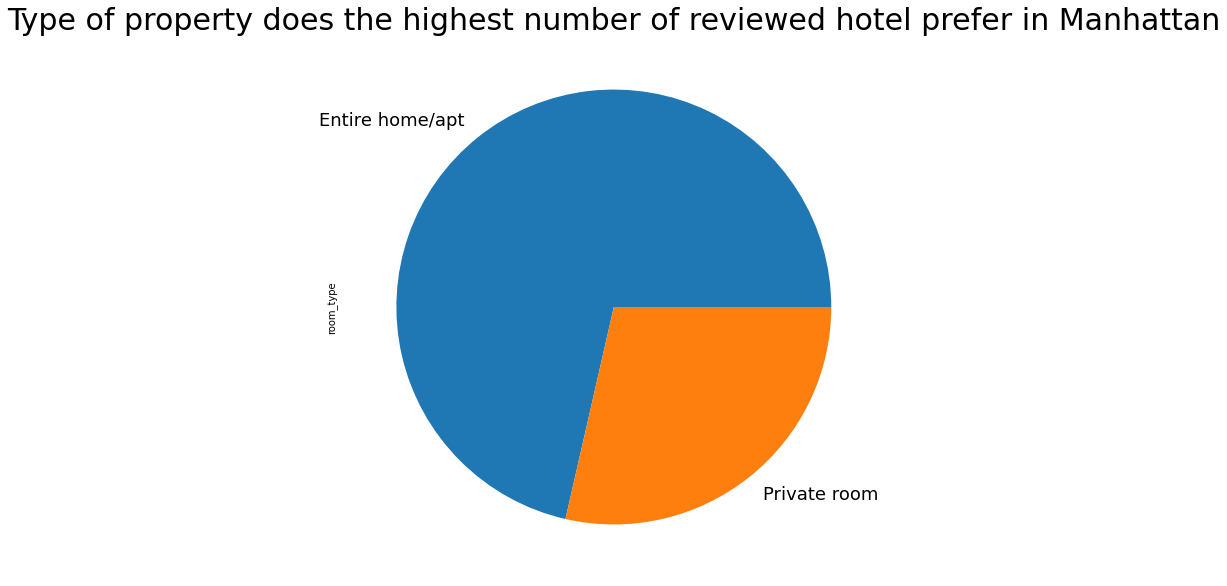

In [ ]:
# What type of property does the highest number of reviewed hotel prefer in Manhattan?

q4_data1 = df_airbnb_viz[df_airbnb_viz['neighbourhood_group'] == 'Manhattan']
q4_data2 = q4_data1.groupby('name')['number_of_reviews'].sum().sort_values(ascending=False)
q4_data3 = q4_data2.head(5)
q4_data4 = list(dict(q4_data3).keys())
print(f'The highest number of reviewed hotel in Manhatten is {q4_data4[0]}')
q4_data5 = df_airbnb_viz[df_airbnb_viz['name'] == q4_data4[0]]
q4_data6 = q4_data5.groupby('room_type')['room_type'].count().sort_values(ascending=False)



q4_data6.plot(kind='pie',figsize = (30,10),fontsize = 18)
plt.title('Type of property does the highest number of reviewed hotel prefer in Manhattan',fontsize = 30)




## Q5. What is the average preferred price by customers according to the location?

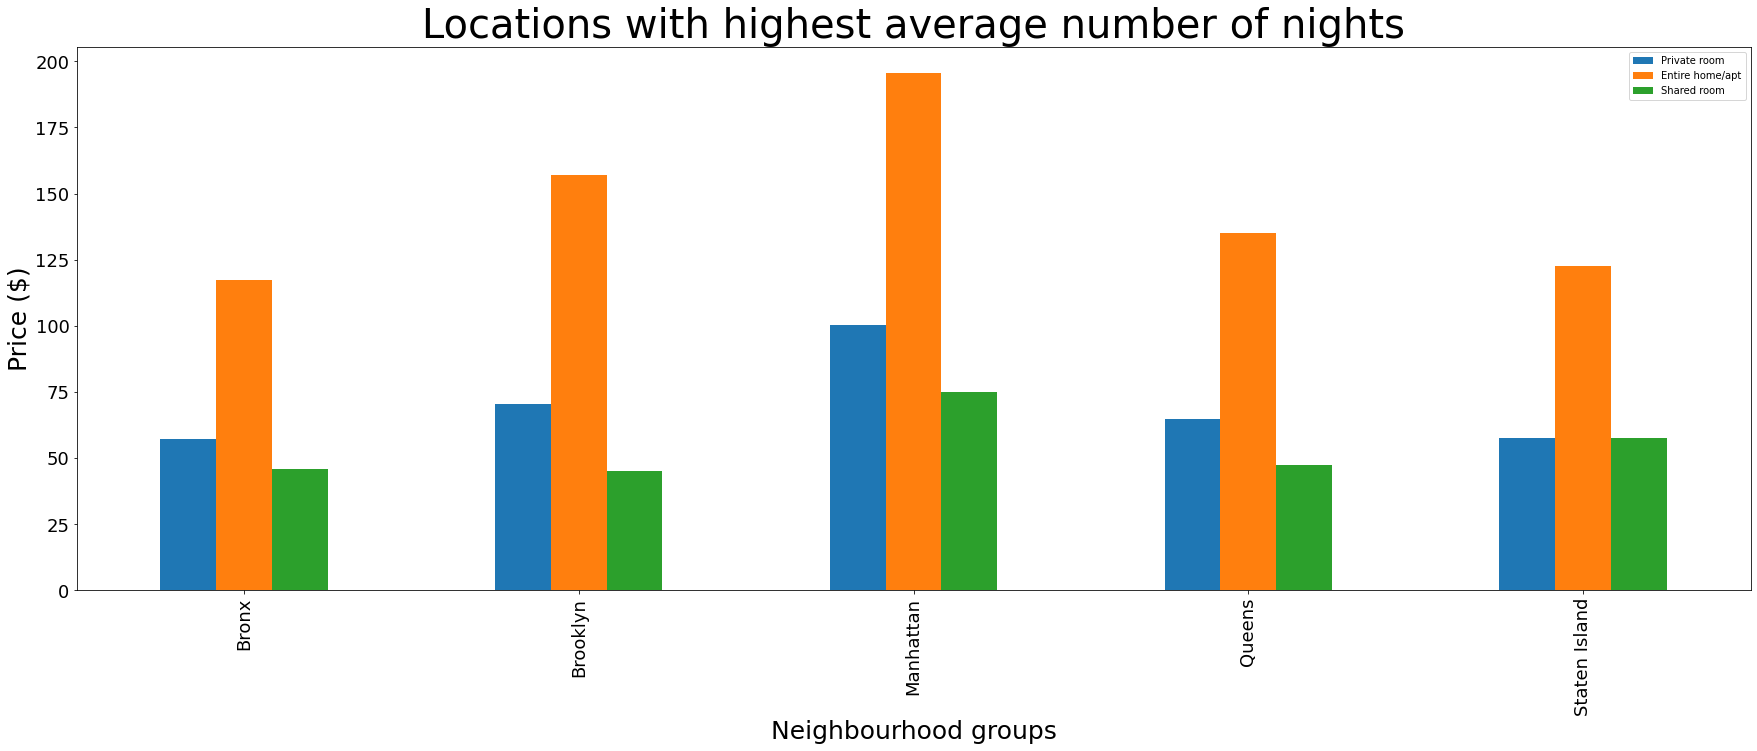

In [ ]:
#What is the average preferred price by customers according to the location?
q5_data1 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Private room']
q5_datas1 = q5_data1.groupby(['neighbourhood_group'],as_index=False).agg({'price':"mean"}).rename(columns ={'price':'Private room'})

q5_data2 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Entire home/apt']
q5_datas2 = q5_data2.groupby(['neighbourhood_group'],as_index=False).agg({'price':"mean"}).rename(columns ={'price':'Entire home/apt'})

q5_data3 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Shared room']
q5_datas3 = q5_data3.groupby(['neighbourhood_group'],as_index=False).agg({'price':"mean"}).rename(columns ={'price':'Shared room'})

# merging all three above datatypes
q5_datas4 = pd.merge(q5_datas1, q5_datas2, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group') 
q5_datas5 = pd.merge(q5_datas4, q5_datas3, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group')

q5_datas5
q5_datas5.set_index('neighbourhood_group', inplace=True)

q5_datas5.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Locations with highest average number of nights', fontsize = 40)
plt.xlabel('Neighbourhood groups', fontsize = 25)
plt.ylabel('Price ($)', fontsize = 25)

plt.rcParams['figure.figsize'] = (30, 10)

## Q6. Show the growth trend of average price of hotels in Manhattan 

Text(0, 0.5, 'Price ($)')

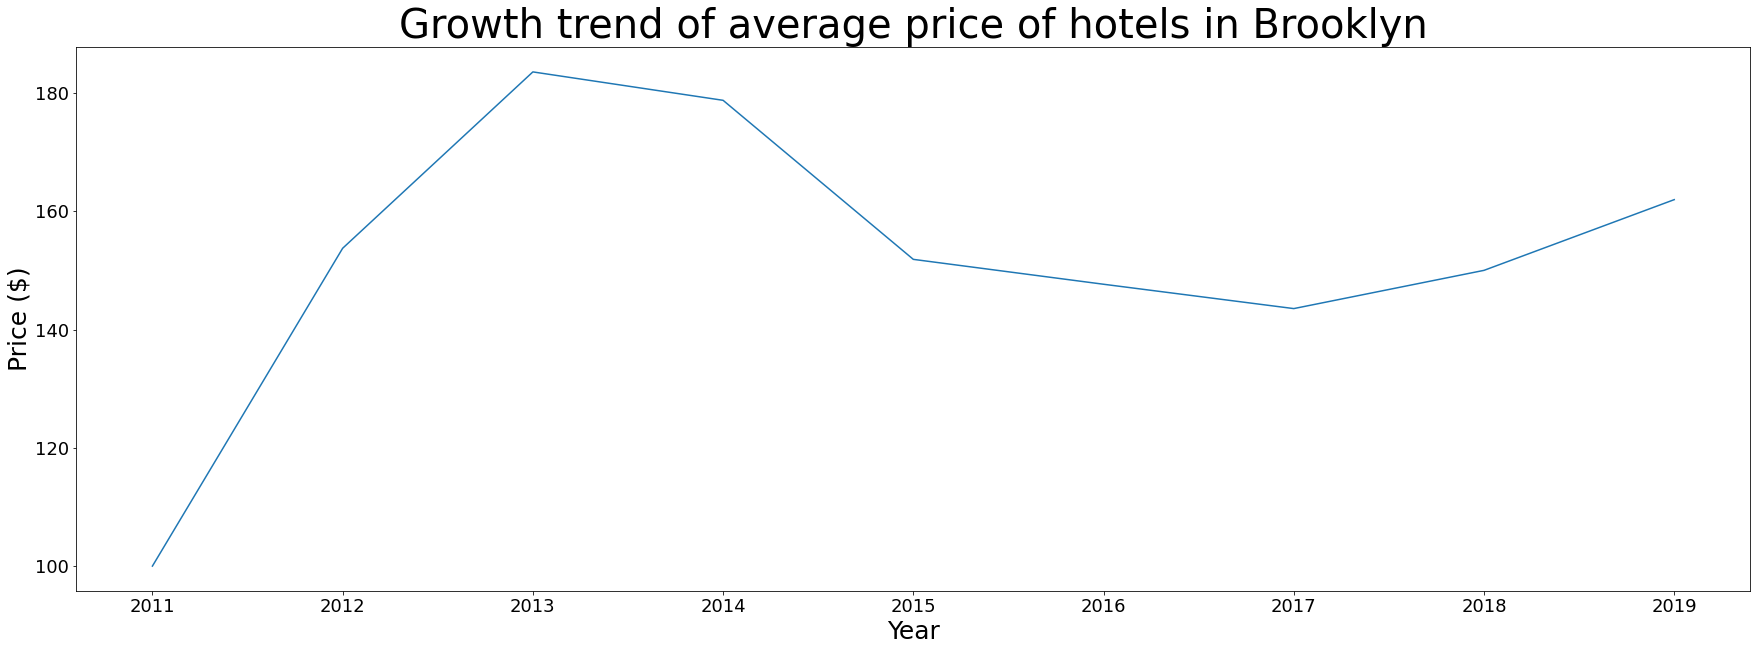

In [ ]:
#Show the growth trend of average price of hotels in Manhattan 
q6_data1 = df_airbnb_viz[df_airbnb_viz['neighbourhood_group'] == 'Manhattan']
q6_data2 = q6_data1.groupby('last_year')['price'].mean()

q6_data2.plot(kind='line',figsize = (30,10),fontsize = 18)

plt.title('Growth trend of average price of hotels in Brooklyn', fontsize = 40)
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Price ($)', fontsize = 25)

## Q7.What is the average number of nights stayed in ecah room type?

Text(0, 0.5, 'No. of nights')

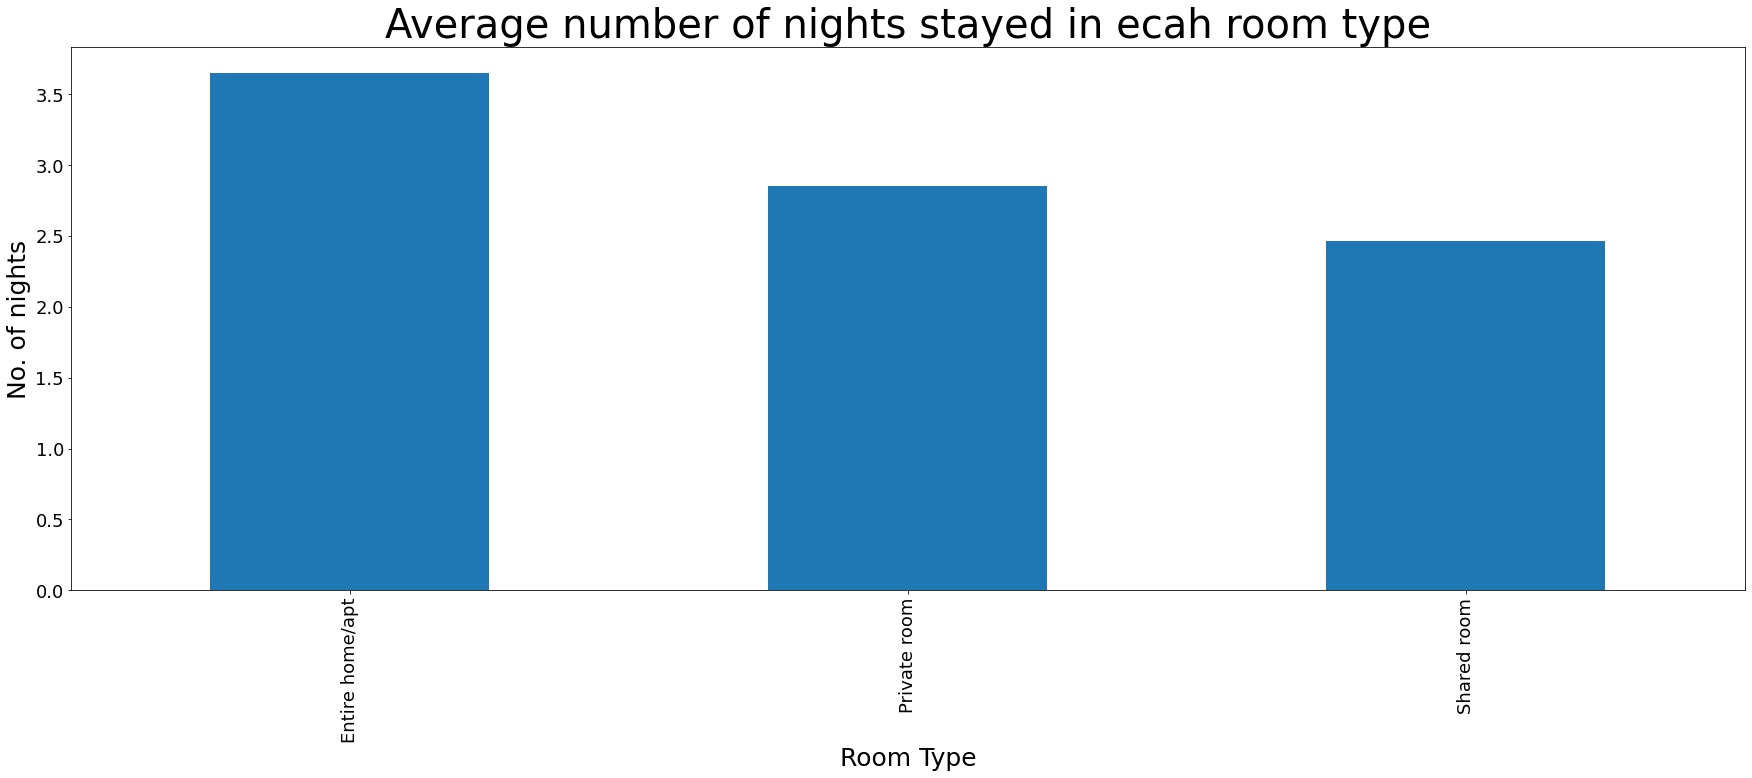

In [ ]:
q7_data1 = df_airbnb_viz.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)
q7_data2 = q7_data1.head(30)
q7_data2.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Average number of nights stayed in ecah room type', fontsize = 40)
plt.xlabel('Room Type', fontsize = 25)
plt.ylabel('No. of nights', fontsize = 25)

## Q8.Find relation between average reviews per month and Nighbourhood groups for each room type

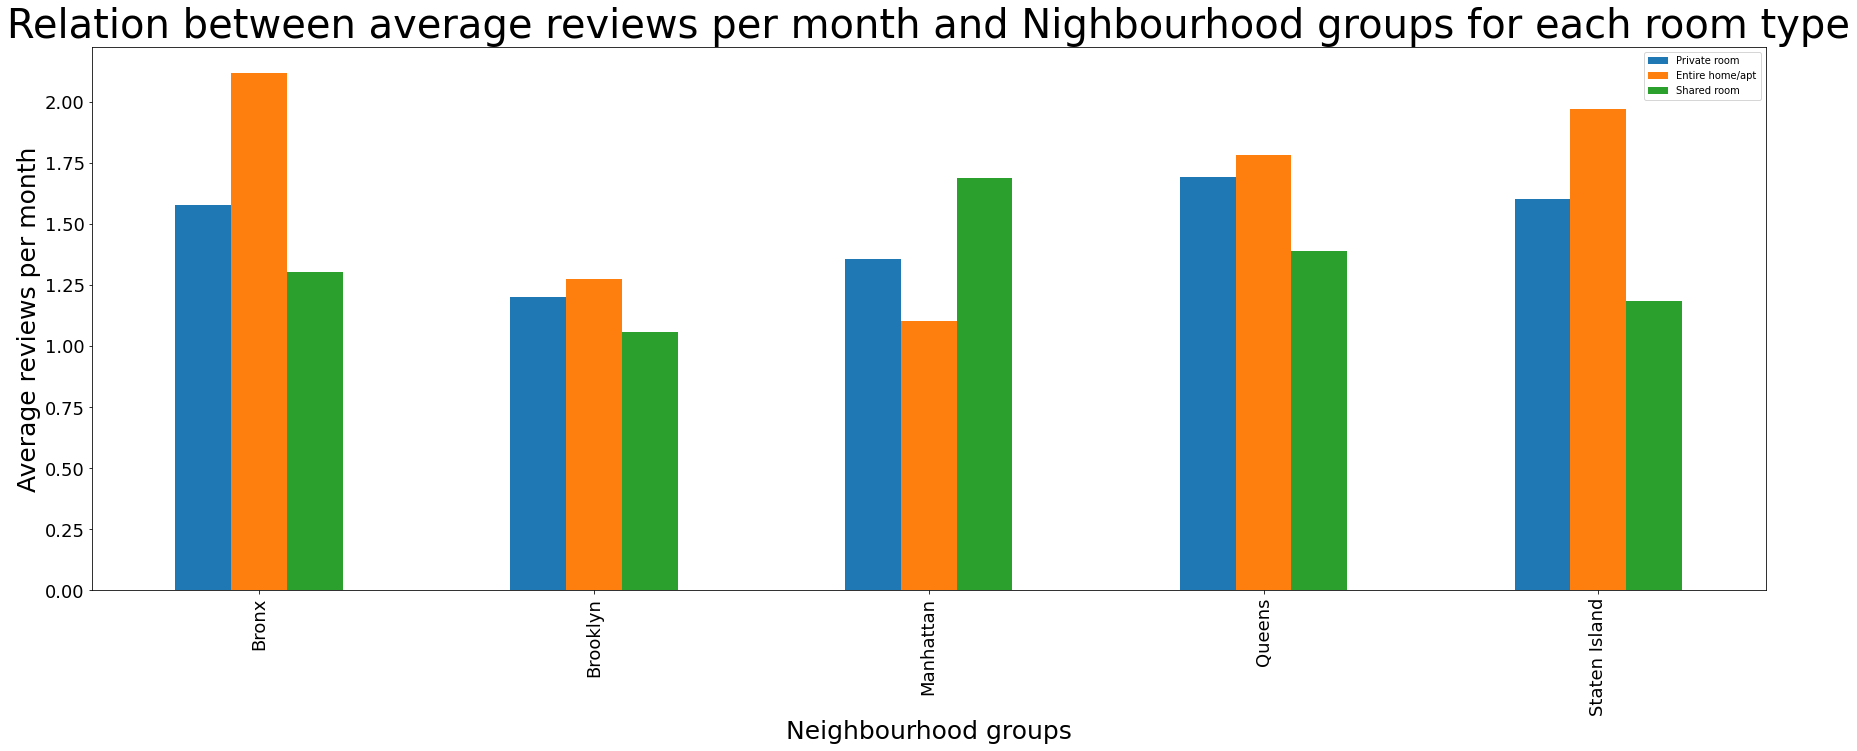

In [ ]:
# Find relation between average reviews per month and Nighbourhood groups for each room type
q8_data1 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Private room']
q8_datas1 = q8_data1.groupby(['neighbourhood_group'],as_index=False).agg({'reviews_per_month':"mean"}).rename(columns ={'reviews_per_month':'Private room'})

q8_data2 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Entire home/apt']
q8_datas2 = q8_data2.groupby(['neighbourhood_group'],as_index=False).agg({'reviews_per_month':"mean"}).rename(columns ={'reviews_per_month':'Entire home/apt'})

q8_data3 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Shared room']
q8_datas3 = q8_data3.groupby(['neighbourhood_group'],as_index=False).agg({'reviews_per_month':"mean"}).rename(columns ={'reviews_per_month':'Shared room'})

# merging all three above datatypes
q8_datas4 = pd.merge(q8_datas1, q8_datas2, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group') 
q8_datas5 = pd.merge(q8_datas4, q8_datas3, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group')

q8_datas5
q8_datas5.set_index('neighbourhood_group', inplace=True)

q8_datas5.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Relation between average reviews per month and Nighbourhood groups for each room type', fontsize = 40)
plt.xlabel('Neighbourhood groups', fontsize = 25)
plt.ylabel('Average reviews per month', fontsize = 25)

plt.rcParams['figure.figsize'] = (30, 10)

## Q9. Show the spread of average prefered price by customers according to the number of reviews of hotel.

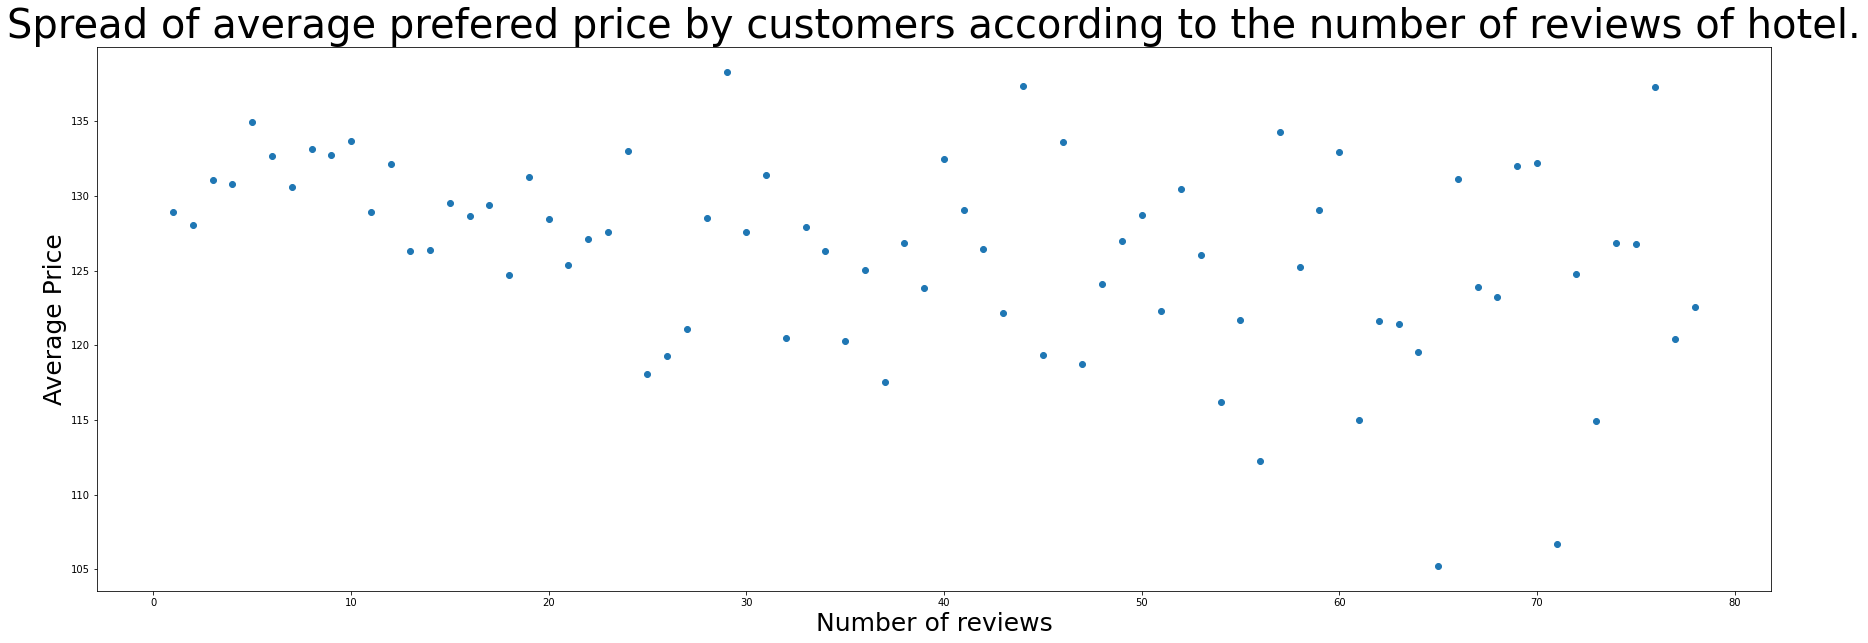

In [ ]:
# 9. Show the spread of average prefered price by customers according to the number of reviews of hotel.
q9_data1 = df_airbnb_viz.groupby(['number_of_reviews'],as_index=False).agg({'price':"mean"}).rename(columns ={'price':'average_price'})
q9_data1

plt.scatter(q9_data1['number_of_reviews'], q9_data1['average_price'], alpha=1)
plt.title('Spread of average prefered price by customers according to the number of reviews of hotel.', fontsize = 40)
plt.xlabel('Number of reviews', fontsize = 25)
plt.ylabel('Average Price', fontsize = 25)
plt.show()
plt.rcParams['figure.figsize'] = (30, 10)

## Q10. What are the average avilability throughout the year of room types in each Nighbourhood group?

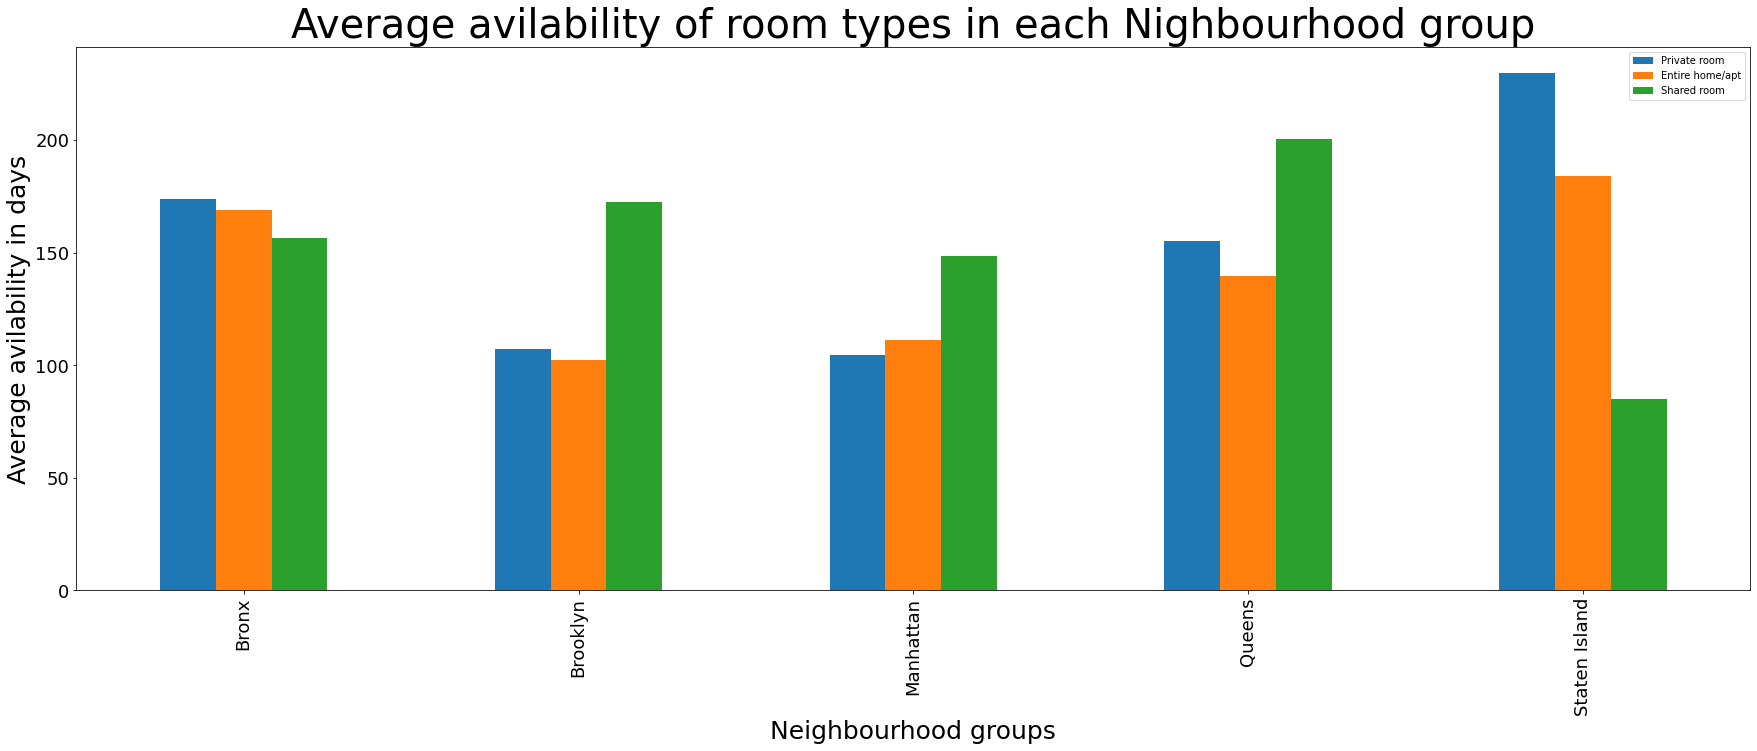

In [ ]:
# 10. What are the average avilability throughout the year of room types in each Nighbourhood group?

q10_data1 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Private room']
q10_datas1 = q10_data1.groupby(['neighbourhood_group'],as_index=False).agg({'availability_365':"mean"}).rename(columns ={'availability_365':'Private room'})

q10_data2 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Entire home/apt']
q10_datas2 = q10_data2.groupby(['neighbourhood_group'],as_index=False).agg({'availability_365':"mean"}).rename(columns ={'availability_365':'Entire home/apt'})

q10_data3 = df_airbnb_viz[df_airbnb_viz['room_type'] == 'Shared room']
q10_datas3 = q10_data3.groupby(['neighbourhood_group'],as_index=False).agg({'availability_365':"mean"}).rename(columns ={'availability_365':'Shared room'})

# merging all three above datatypes
q10_datas4 = pd.merge(q10_datas1, q10_datas2, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group') 
q10_datas5 = pd.merge(q10_datas4, q10_datas3, how='inner',left_on='neighbourhood_group',right_on='neighbourhood_group')

q10_datas5
q10_datas5.set_index('neighbourhood_group', inplace=True)

q10_datas5.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Average avilability throughout the year of room types in each Nighbourhood group', fontsize = 40)
plt.xlabel('Neighbourhood groups', fontsize = 25)
plt.ylabel('Average avilability in days', fontsize = 25)

plt.rcParams['figure.figsize'] = (30, 10)

In [ ]:
df_airbnb_viz.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,conv_last_dt,last_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1.0,9,2018-10-19,0.21,3.5,365,2018-10-19,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45,2019-05-21,0.38,2.0,355,2019-05-21,2019


## Q11. Prefered hotels with highest monthly reviews at the price range of 200-300 USD in Sunnyside neighbourhood.

In [ ]:
# Q11 .Prefered hotels with highest monthly reviews at the price range of 200-300 USD in Sunnyside neighbourhood.
q11_data1 = df_airbnb_viz[df_airbnb_viz['neighbourhood'] == 'Sunnyside']
boolean_series = q11_data1["price"].between(200, 300, inclusive = True)
q11_data2 = q11_data1[boolean_series]

q11_data3 = pd.DataFrame(q11_data2.groupby(['host_id','host_name','neighbourhood','minimum_nights','number_of_reviews','price'])['reviews_per_month'].max().sort_values(ascending=False))
q11_data3

# q11_data3 = q11_data2[boolean_series].groupby(['name'],as_index=False).agg({'reviews_per_month':"max"})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


reviews_per_month
host_id   host_name neighbourhood minimum_nights number_of_reviews price                   
27431753  Lasata    Sunnyside     4.0            78                204.0               4.49
13077418  Richard   Sunnyside     2.0            4                 200.0               4.00
58234433  Martin    Sunnyside     1.0            15                260.0               1.71
                                                 14                261.0               1.47
4976277   Antonis   Sunnyside     5.0            19                200.0               1.18
237482248 Jacob     Sunnyside     1.0            1                 200.0               1.00
83627325  Jared     Sunnyside     1.0            6                 249.0               0.18
204774833 Tatiana   Sunnyside     1.0            1                 200.0               0.09

## Q12. Most rated / demanded host in Brooklyn as per Airbnb booking data.

Text(0, 0.5, 'Total number of listings')

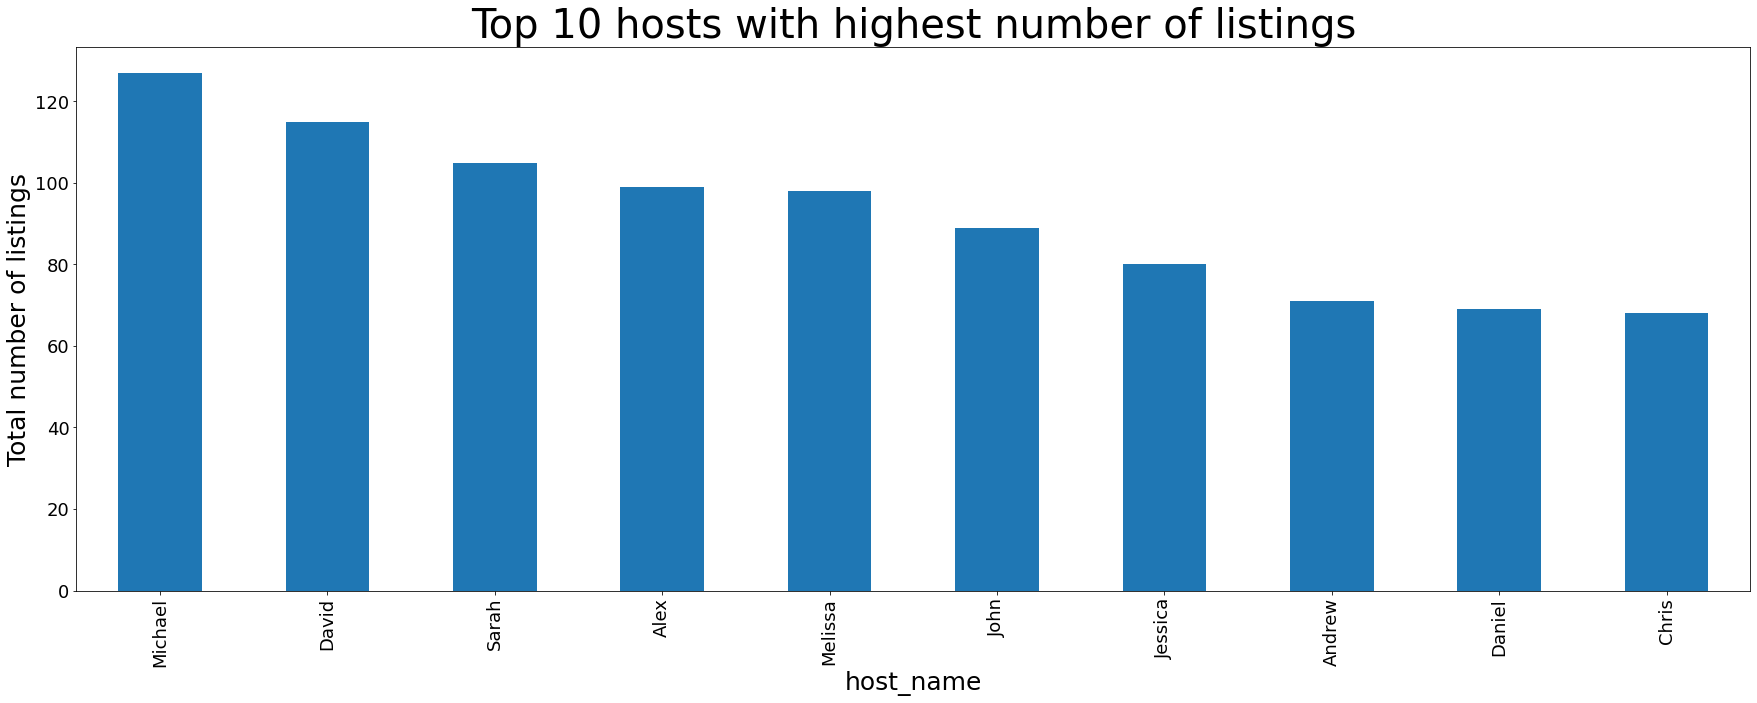

In [ ]:
# Q12 Most rated / demanded host in Brooklyn as per Airbnb booking data.
q12_data1 = df_airbnb_viz[df_airbnb_viz['neighbourhood_group'] == 'Brooklyn']
q12_data2 = q12_data1.groupby('host_name')['number_of_reviews'].count().sort_values(ascending=False)
q12_data3 = q12_data2.head(10)

q12_data3.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Top 10 hosts with highest number of listings', fontsize = 40)
plt.xlabel('host_name', fontsize = 25)
plt.ylabel('Total number of listings', fontsize = 25)

## Q13. Top 10 hosts with maximum number of listings.

Text(0, 0.5, 'Total number of listings')

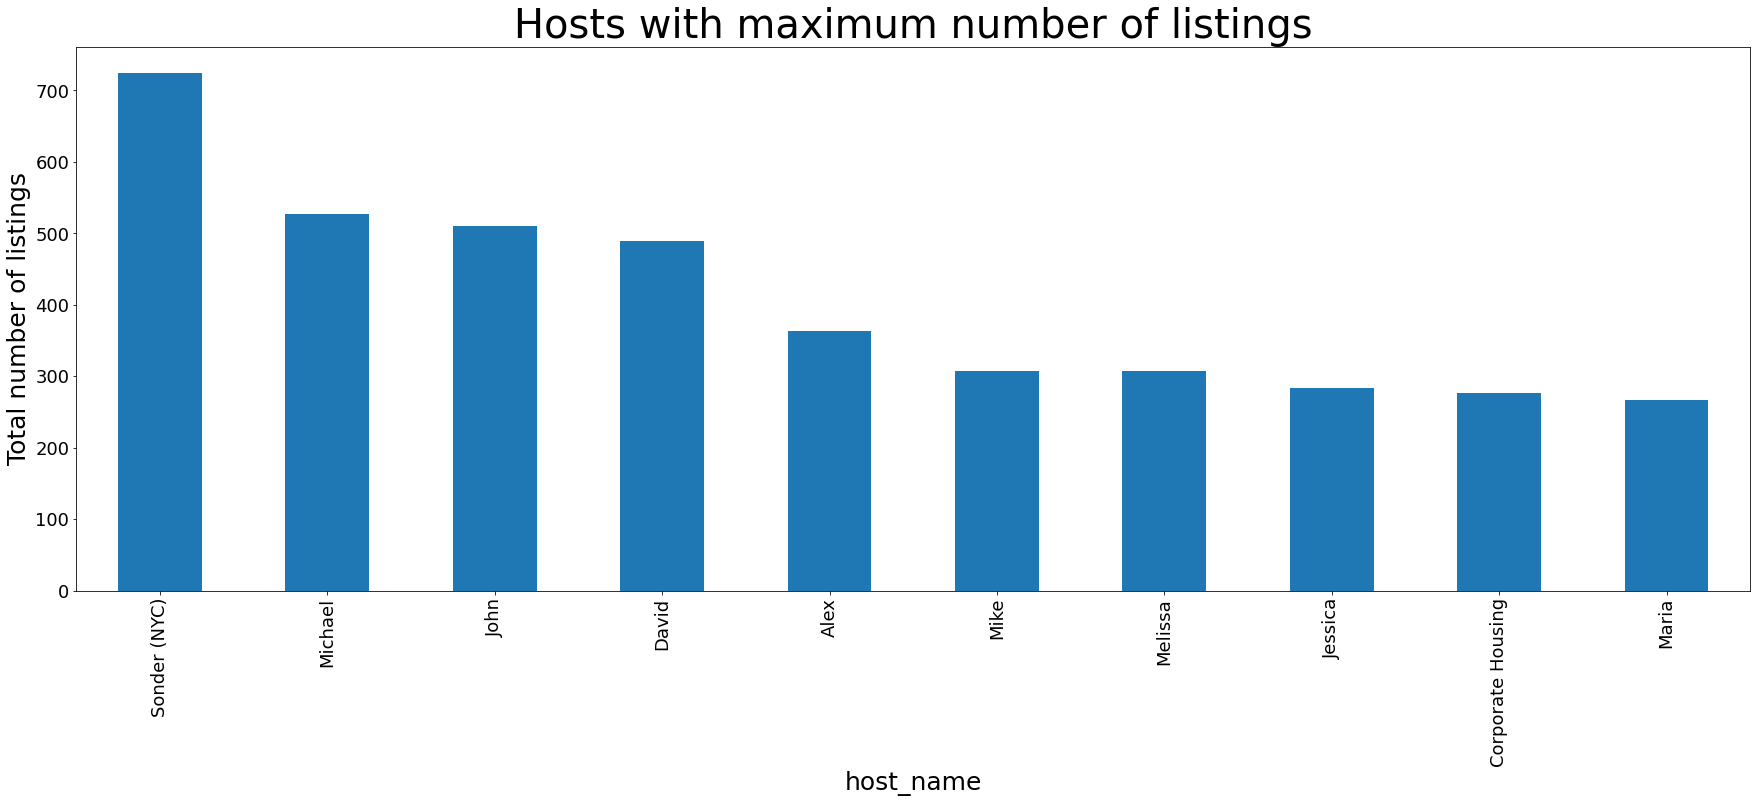

In [ ]:
#Q13 Top 10 hosts with maximum number of listings.
q13_data1 = df_airbnb_viz.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False)
q13_data2 = q13_data1.head(10)
q13_data2.plot(kind='bar',figsize = (30,10),fontsize = 18)

plt.title('Hosts with maximum number of listings', fontsize = 40)
plt.xlabel('host_name', fontsize = 25)
plt.ylabel('Total number of listings', fontsize = 25)

## Q14. Top 10 low-priced hosts with maximum avilability.

Text(0, 0.5, 'Price $')

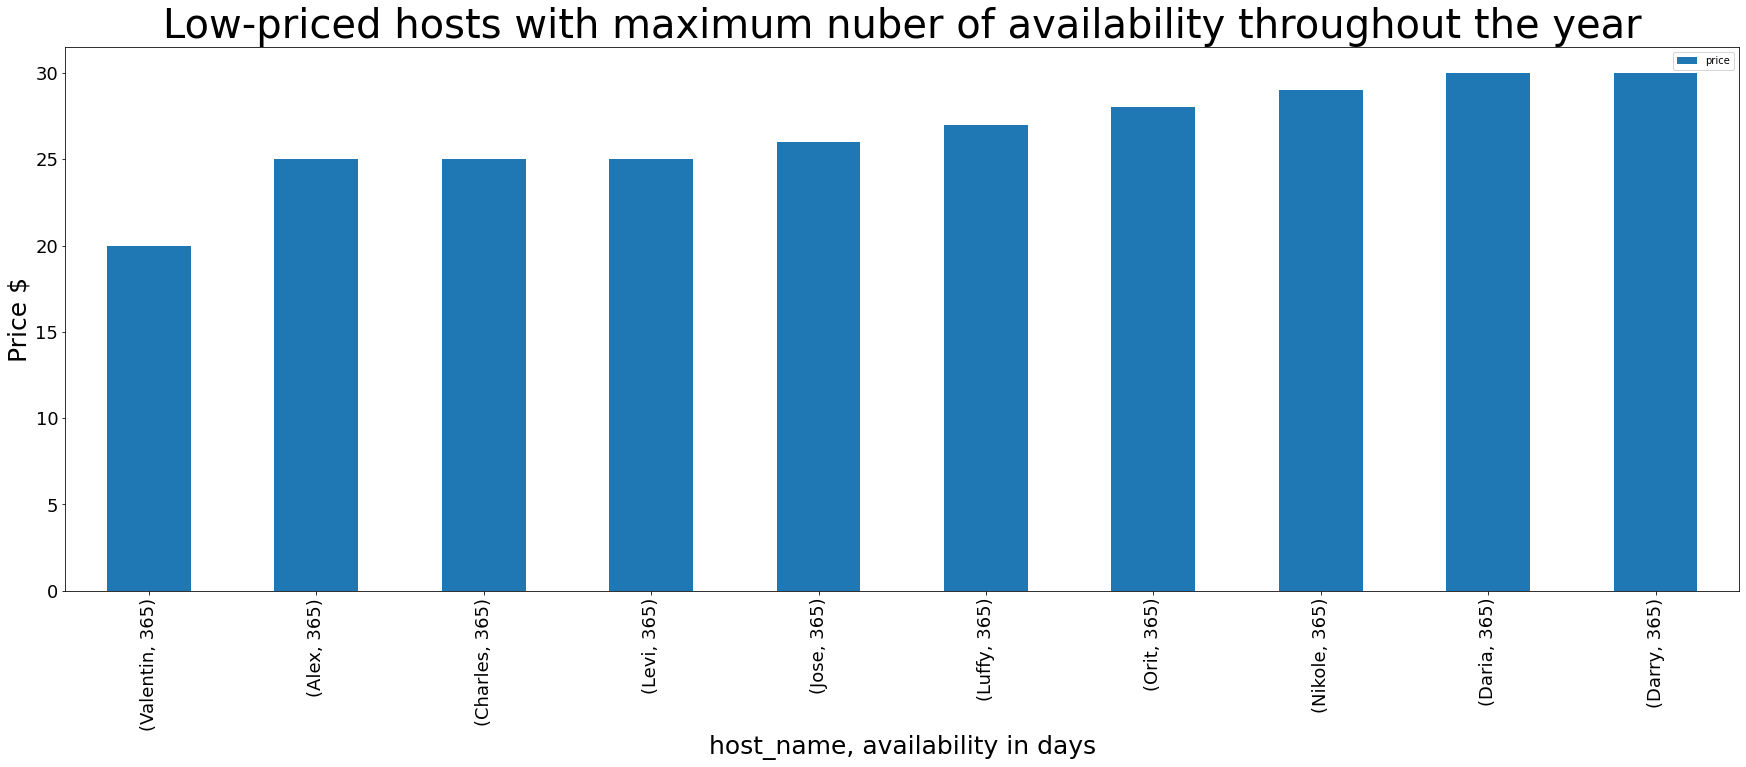

In [ ]:
# Top 10 low-priced hosts with maximum avilability.

q14_data1 = pd.DataFrame(df_airbnb_viz.groupby(['host_name','availability_365'])['price'].min()).sort_values(by=['availability_365','price'], ascending=[False,True])

q14_data1.head(10)

q14_data1.head(10).plot(kind='bar', stacked=True, figsize = (30,10),fontsize = 18)

plt.title('Low-priced hosts with maximum nuber of availability throughout the year', fontsize = 40)
plt.xlabel('host_name, availability in days', fontsize = 25)
plt.ylabel('Price $', fontsize = 25)

## Q15. Top 10 reviewed hosts with maximum number of reviews.

Text(0, 0.5, 'Total number of reviews')

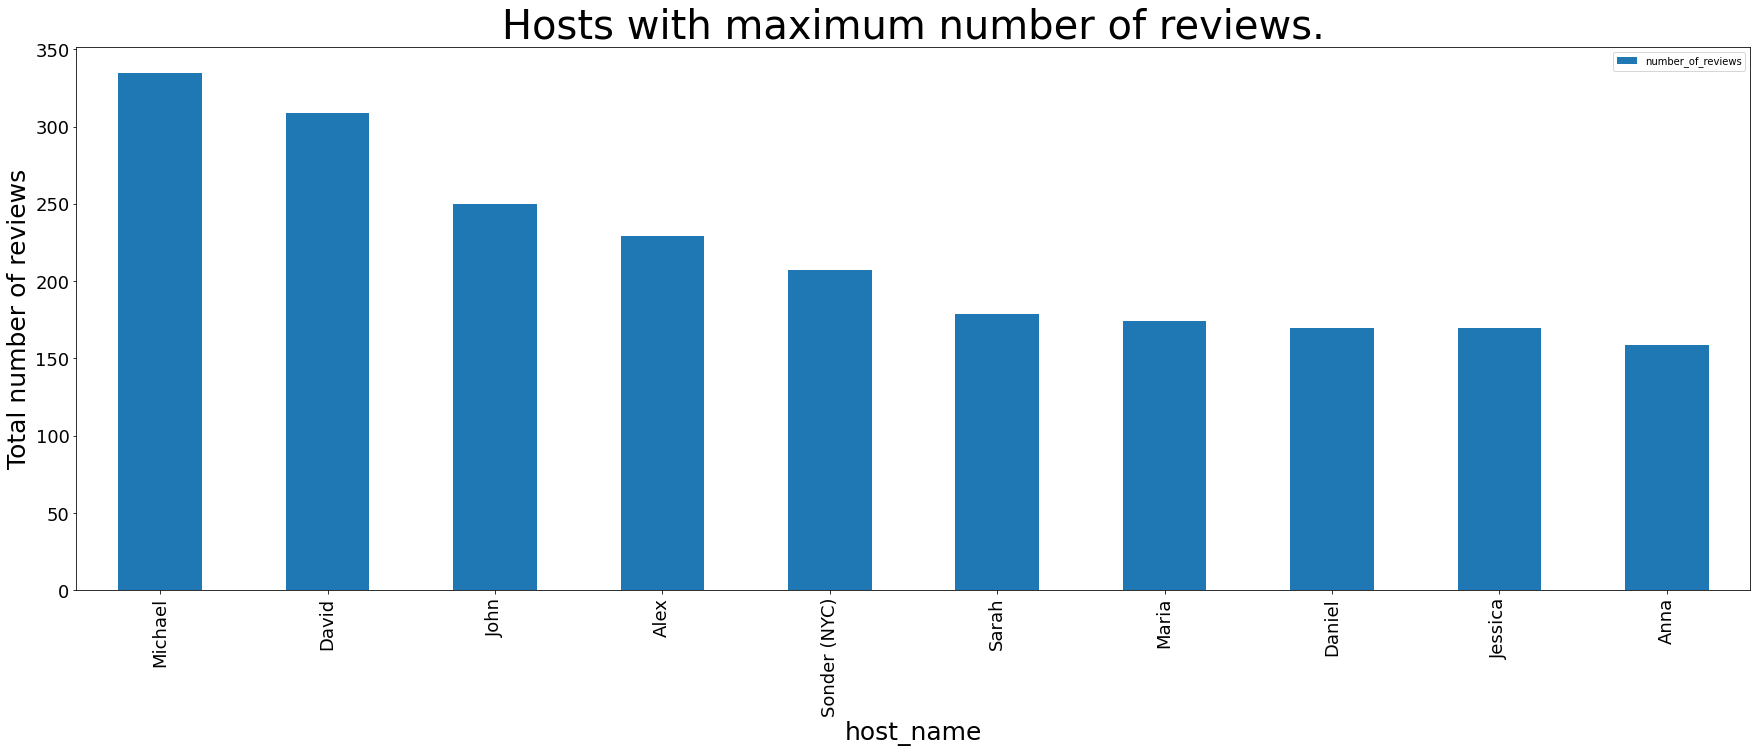

In [ ]:
# Q15. Top 10 reviewed hosts with maximum number of reviews.
q15_data1 = pd.DataFrame(df_airbnb_viz.groupby(['host_name'])['number_of_reviews'].count()).sort_values(by=['number_of_reviews'], ascending=[False])

q15_data1.head(10)

q15_data1.head(10).plot(kind='bar', stacked=True, figsize = (30,10),fontsize = 18)

plt.title('Hosts with maximum number of reviews.', fontsize = 40)
plt.xlabel('host_name', fontsize = 25)
plt.ylabel('Total number of reviews', fontsize = 25)

## Q16. What is the average price of private rooms in Williamsburg.

Text(0, 0.5, 'Price $')

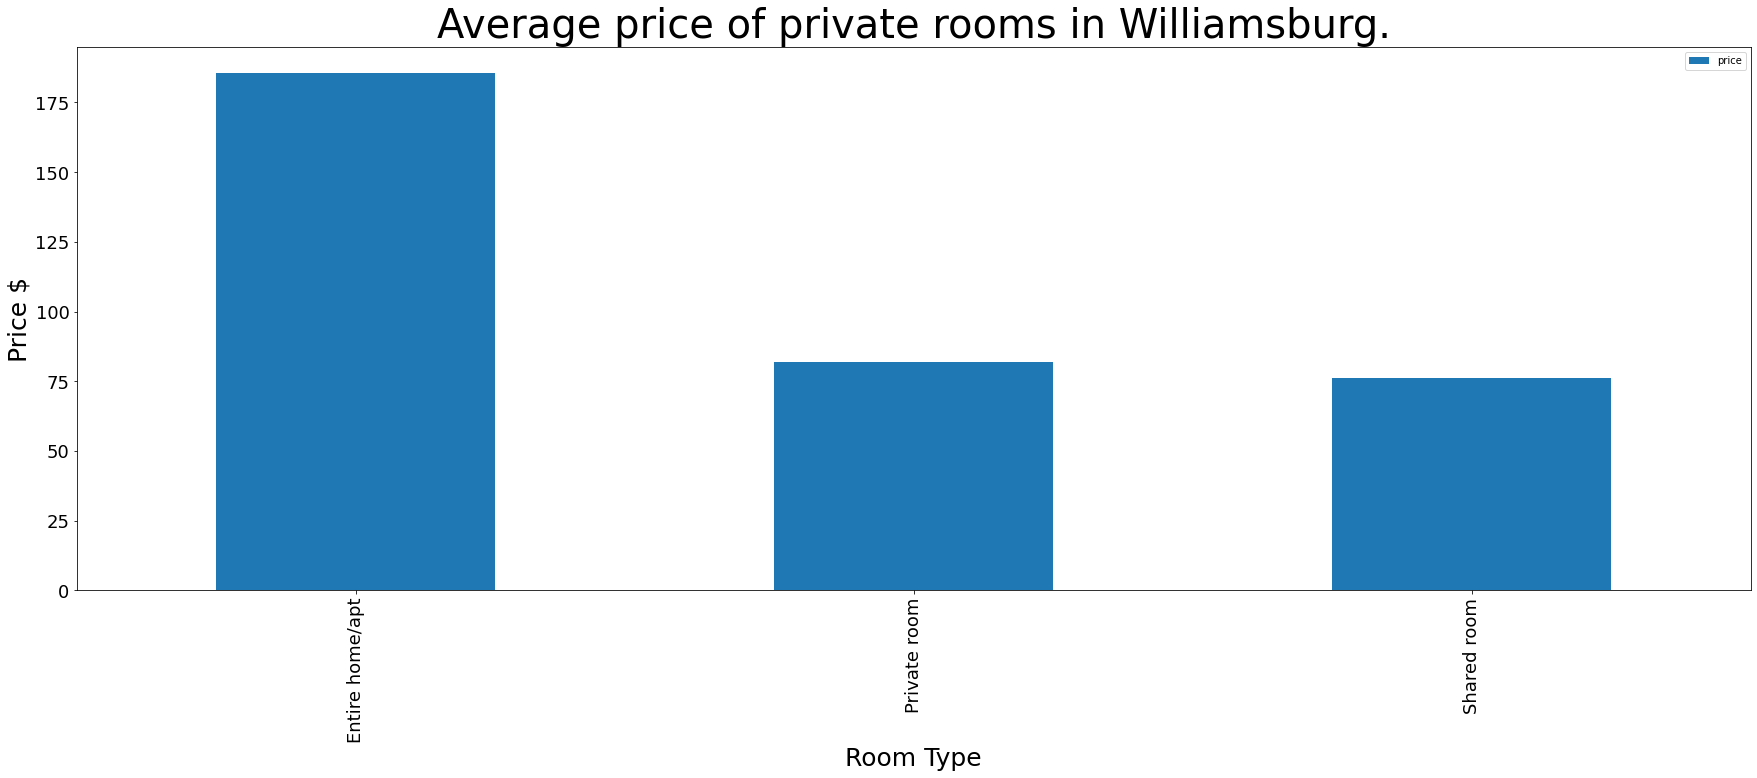

In [ ]:
# Q16. What is the average price of private rooms in Williamsburg.

q16_data1 = df_airbnb_viz[df_airbnb_viz['neighbourhood'] == 'Williamsburg']
q16_data2 = pd.DataFrame(q16_data1.groupby(['room_type'])['price'].mean().sort_values(ascending=False))

q16_data2.plot(kind='bar', stacked=True, figsize = (30,10),fontsize = 18)

plt.title('Average price of private rooms in Williamsburg.', fontsize = 40)
plt.xlabel('Room Type', fontsize = 25)
plt.ylabel('Price $', fontsize = 25)


In [ ]:
q16_data2

,price
room_type,
Entire home/apt,185.717973
Private room,81.940242
Shared room,76.333333
